# Time series analysis of solar power generation data

The attached file was prepared using the pv_2years_eng.csv data file (in the case of annual forecasts, if there is insufficient data, it is okay to use augmentation).Implementation by determining possible time prediction units among minutes, hours, days, months, quarters, and years. Additional techniques may also be used. Submit as Jupyter Notebook and PDF file
1. Using solar power generation data, pv_2years_eng, decompose the time series into trend, seasonal, and residual components and display them with plot().  At this time, decompose using the additive vs. multiplicative model and present the results.
2. Using solar power generation data, pv_2years_eng, to ensure stationarity of the time series, calculate the first-order difference and calculate the autocorrelation lag (lag) using the Statsmodels acf() function and plot_acf(). Find .
3. Using solar power generation data, pv_2years_eng, to ensure stationarity of the time series, calculate the first-order difference and calculate the partial autocorrelation lag (lag) using the Statsmodels pacf() function and plot_acf().
4. Using solar power generation data, pv_2years_eng, implement it as a moving average (MA), and display the moving average prediction results as plot().
5. Using solar power generation data, pv_2years_eng, implement triple exponential smoothing and display the triple exponential smoothing results with plot().
6. Using solar power generation data, pv_2years_eng, implement autoregressive (AR) and display the autoregressive (AR) results in plot().


Our CSV data comprises 17 columns representing various parameters related to a photovoltaic system. These columns are labeled as follows: 'DC_V' for DC voltage, 'DC_A' for DC current, 'DC_W' for DC output, 'AC_V_RS' for AC voltage in phase R to S, 'AC_V_ST' for AC voltage in phase S to T, 'AC_V_TR' for AC voltage in phase T to R, 'AC_A_R' for AC current in phase R, 'AC_A_S' for AC current in phase S, 'AC_A_T' for AC current in phase T, 'AC_W' for AC output, 'AC_TOT' for AC cumulative power generation, 'AC_FREQ' for AC frequency, 'AC_POW' for AC power factor, 'SOL_RAD_SLOPE' for solar radiation slope in W/㎡, 'SOL_RAD_LEVEL' for horizontal solar radiation in W/㎡, 'TMP_MODU' for module temperature in ℃, and 'TMP_CLI' for outdoor temperature in ℃. These columns collectively provide comprehensive data on the performance and environmental conditions of the photovoltaic system.

[https://drive.google.com/file/d/1y69rxDxg9DbECixU-IWUgtbEP8Hzsk2V/view?usp=drive_link](http://)

[https://drive.google.com/file/d/1d9XF7-XxFbQl8IZUwZz2uirRyYoQvuDp/view?usp=drive_link](http://)

# Professor : Prof. Kihyeon Kwon
# Student : Salaki Reynaldo Joshua | Kangwon National University

# DC Group
* DC_V': 'DC voltage',
* DC_A': 'DC current',
* DC_W': 'DC output',

**Question 1**
Using solar power generation data, pv_2years_eng, decompose the time series into trend, seasonal, and residual components and display them with plot(). At this time, decompose using the additive vs. multiplicative model and present the results.

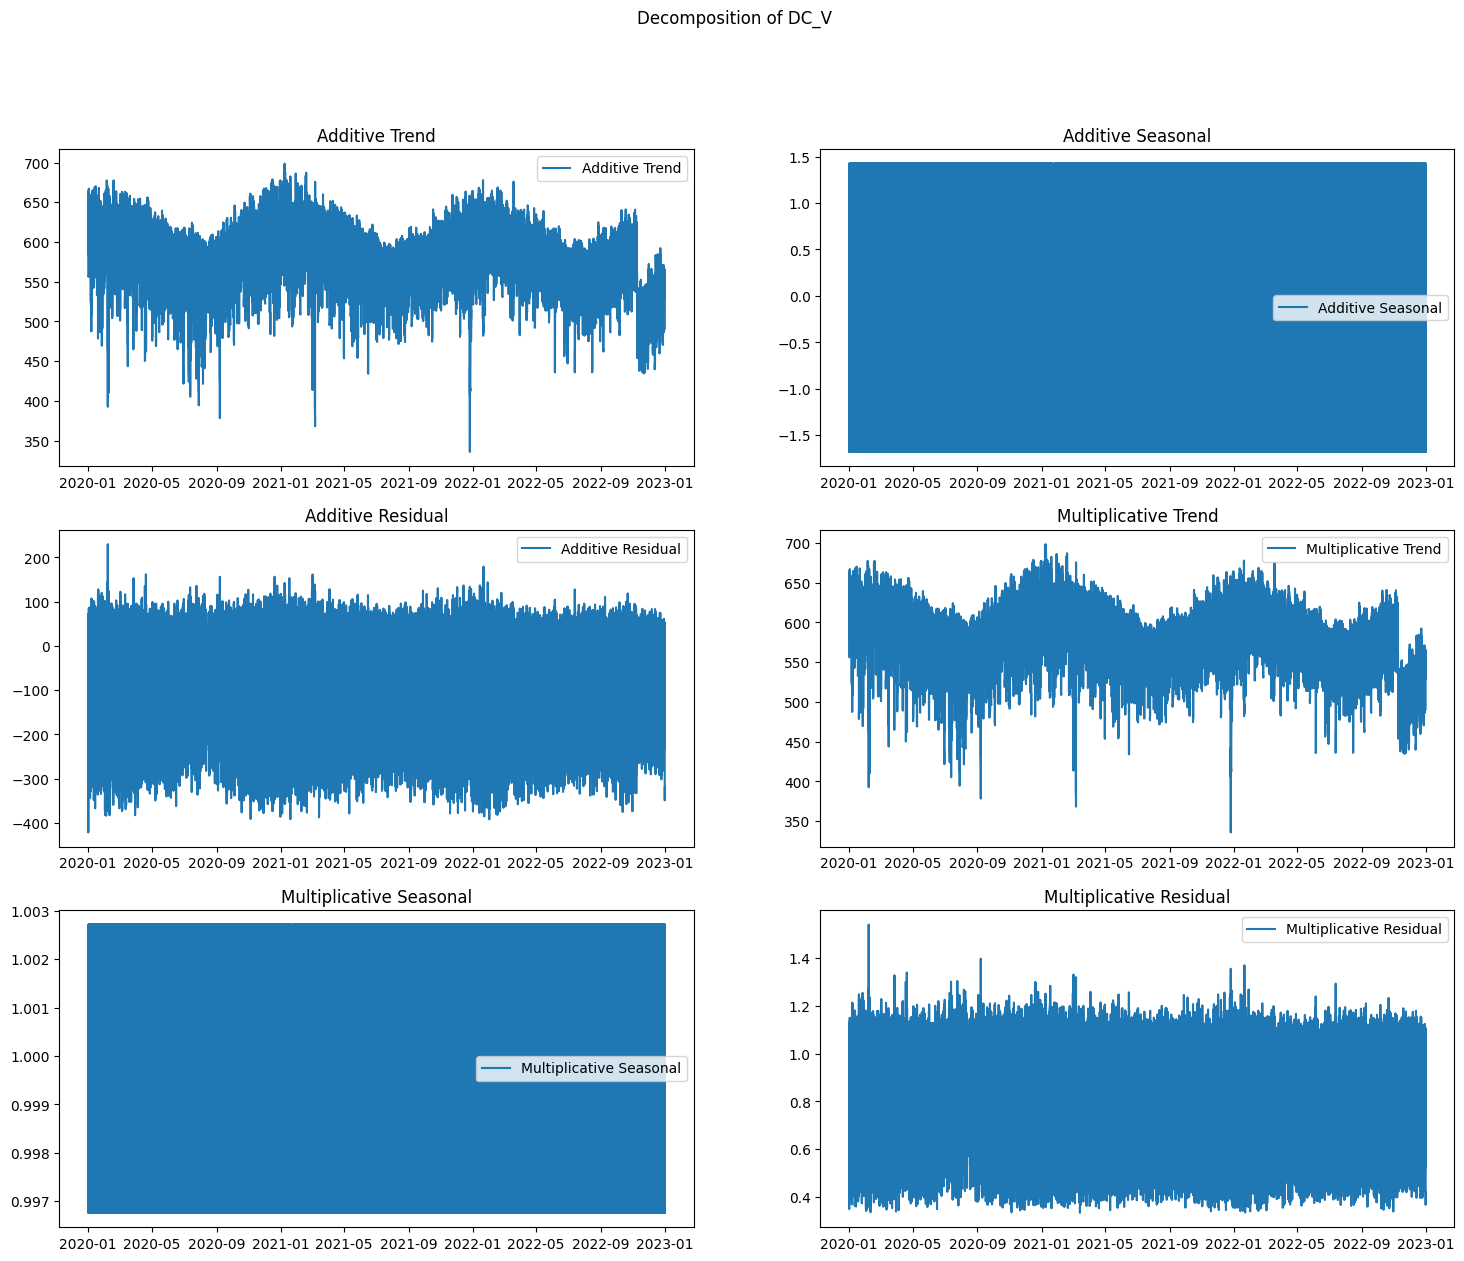

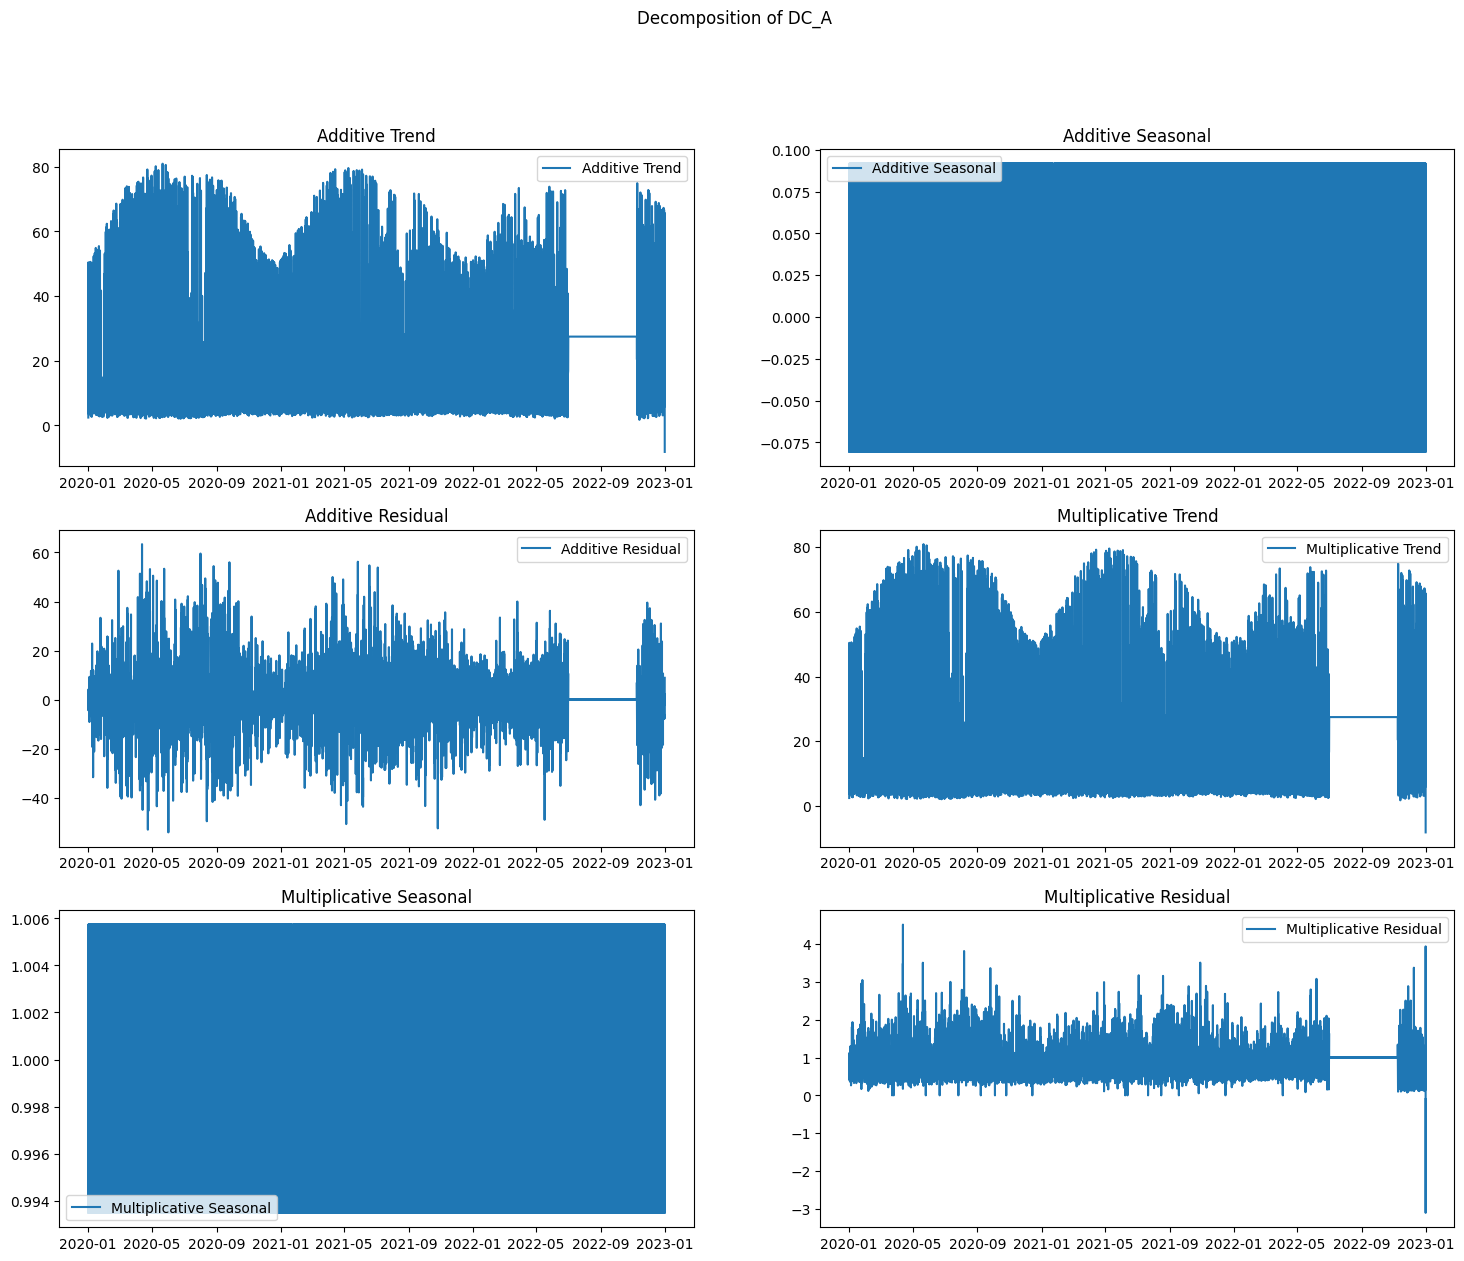

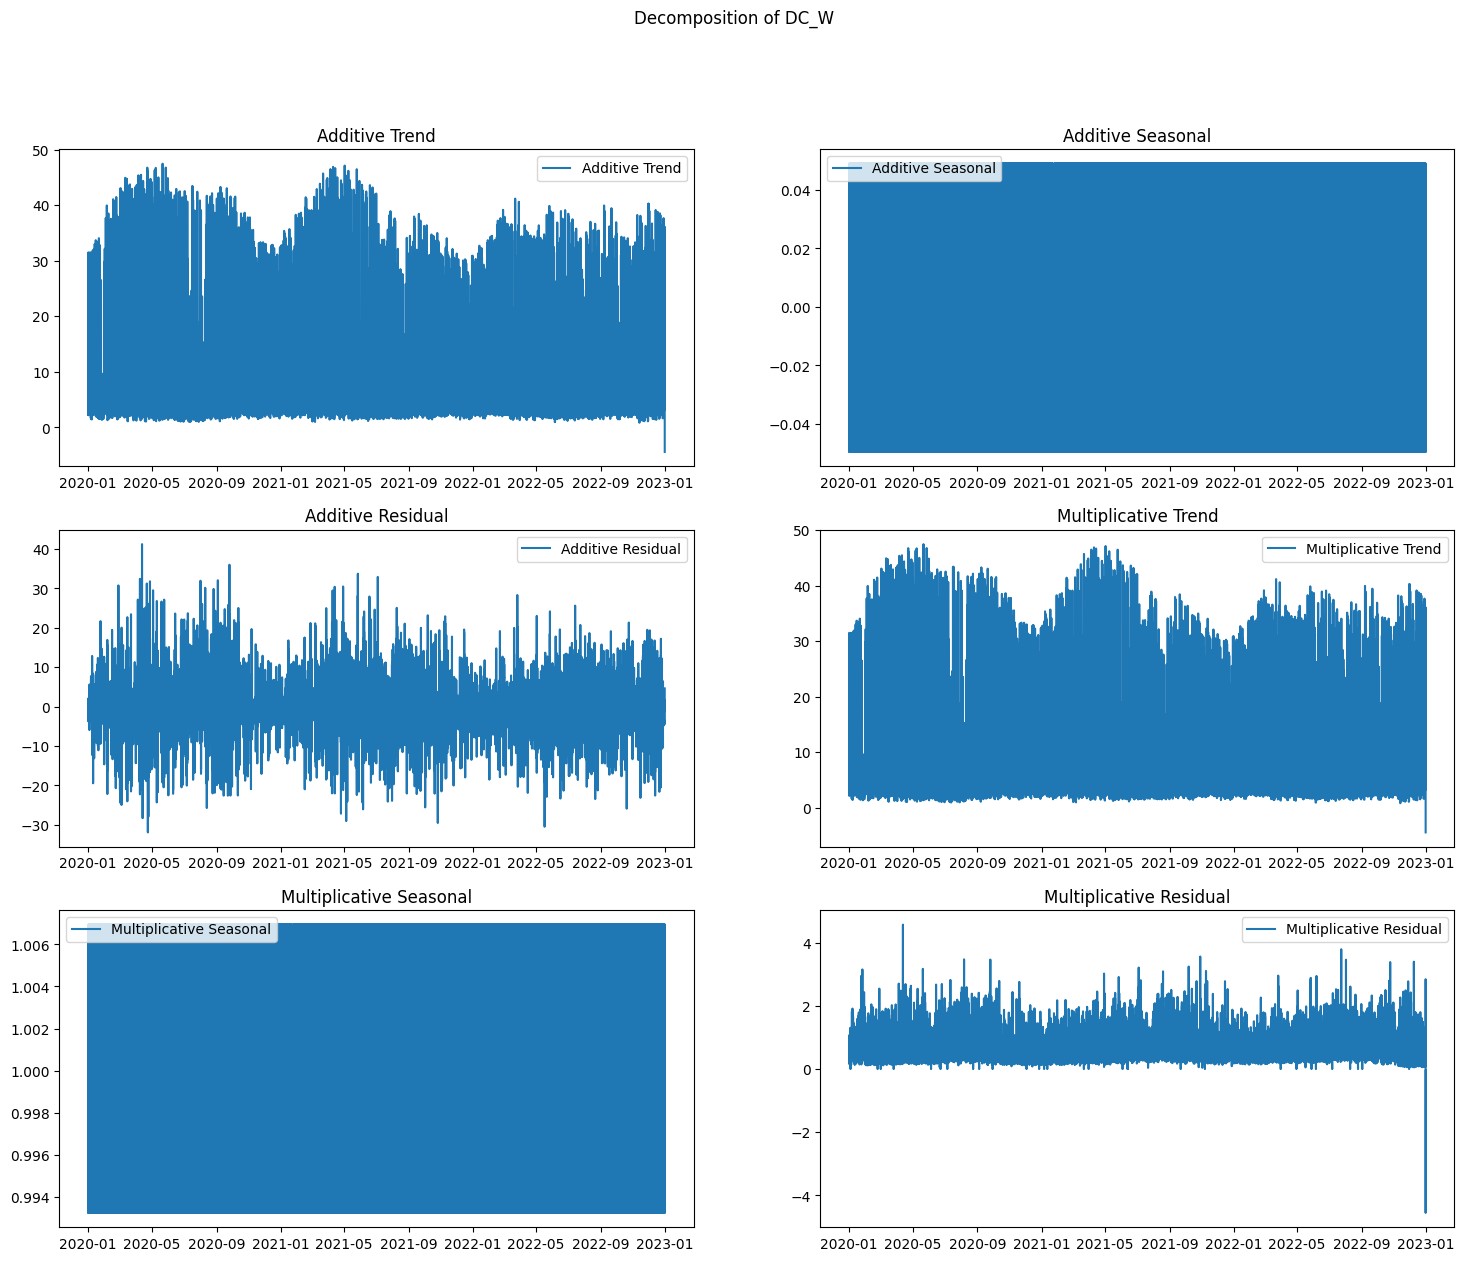

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv')

# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Set the date column as the index
data.set_index('date', inplace=True)

# Handle missing values by filling with mean
data.fillna(data.mean(), inplace=True)

# Add a small value to avoid zero or negative values for multiplicative decomposition
data = data + 1e-8

# Define the columns of interest
columns_of_interest = ['DC_V', 'DC_A', 'DC_W']

# Specify frequency
freq = 'H'

# Decompose the time series using both additive and multiplicative models
for column in columns_of_interest:
    # Additive decomposition
    decomposition_add = seasonal_decompose(data[column], model='additive', period=24, extrapolate_trend='freq')

    # Multiplicative decomposition
    decomposition_mul = seasonal_decompose(data[column], model='multiplicative', period=24, extrapolate_trend='freq')

    # Plot the decomposed components
    plt.figure(figsize=(18, 14))
    plt.subplot(3, 2, 1)
    plt.plot(decomposition_add.trend, label='Additive Trend')
    plt.title('Additive Trend')
    plt.legend()

    plt.subplot(3, 2, 2)
    plt.plot(decomposition_add.seasonal, label='Additive Seasonal')
    plt.title('Additive Seasonal')
    plt.legend()

    plt.subplot(3, 2, 3)
    plt.plot(decomposition_add.resid, label='Additive Residual')
    plt.title('Additive Residual')
    plt.legend()

    plt.subplot(3, 2, 4)
    plt.plot(decomposition_mul.trend, label='Multiplicative Trend')
    plt.title('Multiplicative Trend')
    plt.legend()

    plt.subplot(3, 2, 5)
    plt.plot(decomposition_mul.seasonal, label='Multiplicative Seasonal')
    plt.title('Multiplicative Seasonal')
    plt.legend()

    plt.subplot(3, 2, 6)
    plt.plot(decomposition_mul.resid, label='Multiplicative Residual')
    plt.title('Multiplicative Residual')
    plt.legend()

    plt.suptitle(f'Decomposition of {data[column].name}', fontsize=12)
    plt.show()

**Question 2**
Using solar power generation data, pv_2years_eng, to ensure stationarity of the time series, calculate the first-order difference and calculate the autocorrelation lag (lag) using the Statsmodels acf() function and plot_acf(). Find .

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv')

# Define the columns of interest
columns_of_interest = ['DC_V', 'DC_A', 'DC_W']

# Ensure stationarity of the time series by calculating first-order difference
for column in columns_of_interest:
    data[column + '_diff'] = data[column].diff()

# Plot the first-order difference
plt.figure(figsize=(12, 6))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(len(columns_of_interest), 1, i)
    plt.plot(data.index, data[column + '_diff'], label=f'{column} First-order Difference')
    plt.title(f'{column} First-order Difference')
    plt.xlabel('Date')
    plt.ylabel('Difference')
    plt.legend()
plt.tight_layout()
plt.show()

# Calculate autocorrelation lag using acf() function
for column in columns_of_interest:
    acf_result = acf(data[column + '_diff'].dropna(), nlags=20)
    print(f'Autocorrelation for {column}: {acf_result}')

# Plot autocorrelation using plot_acf() function
for column in columns_of_interest:
    plot_acf(data[column + '_diff'].dropna(), lags=20, title=f'Autocorrelation Plot for {column}')
    plt.show()

**Question 3** Using solar power generation data, pv_2years_eng, to ensure stationarity of the time series, calculate the first-order difference and calculate the partial autocorrelation lag (lag) using the Statsmodels pacf() function and plot_acf(). ).

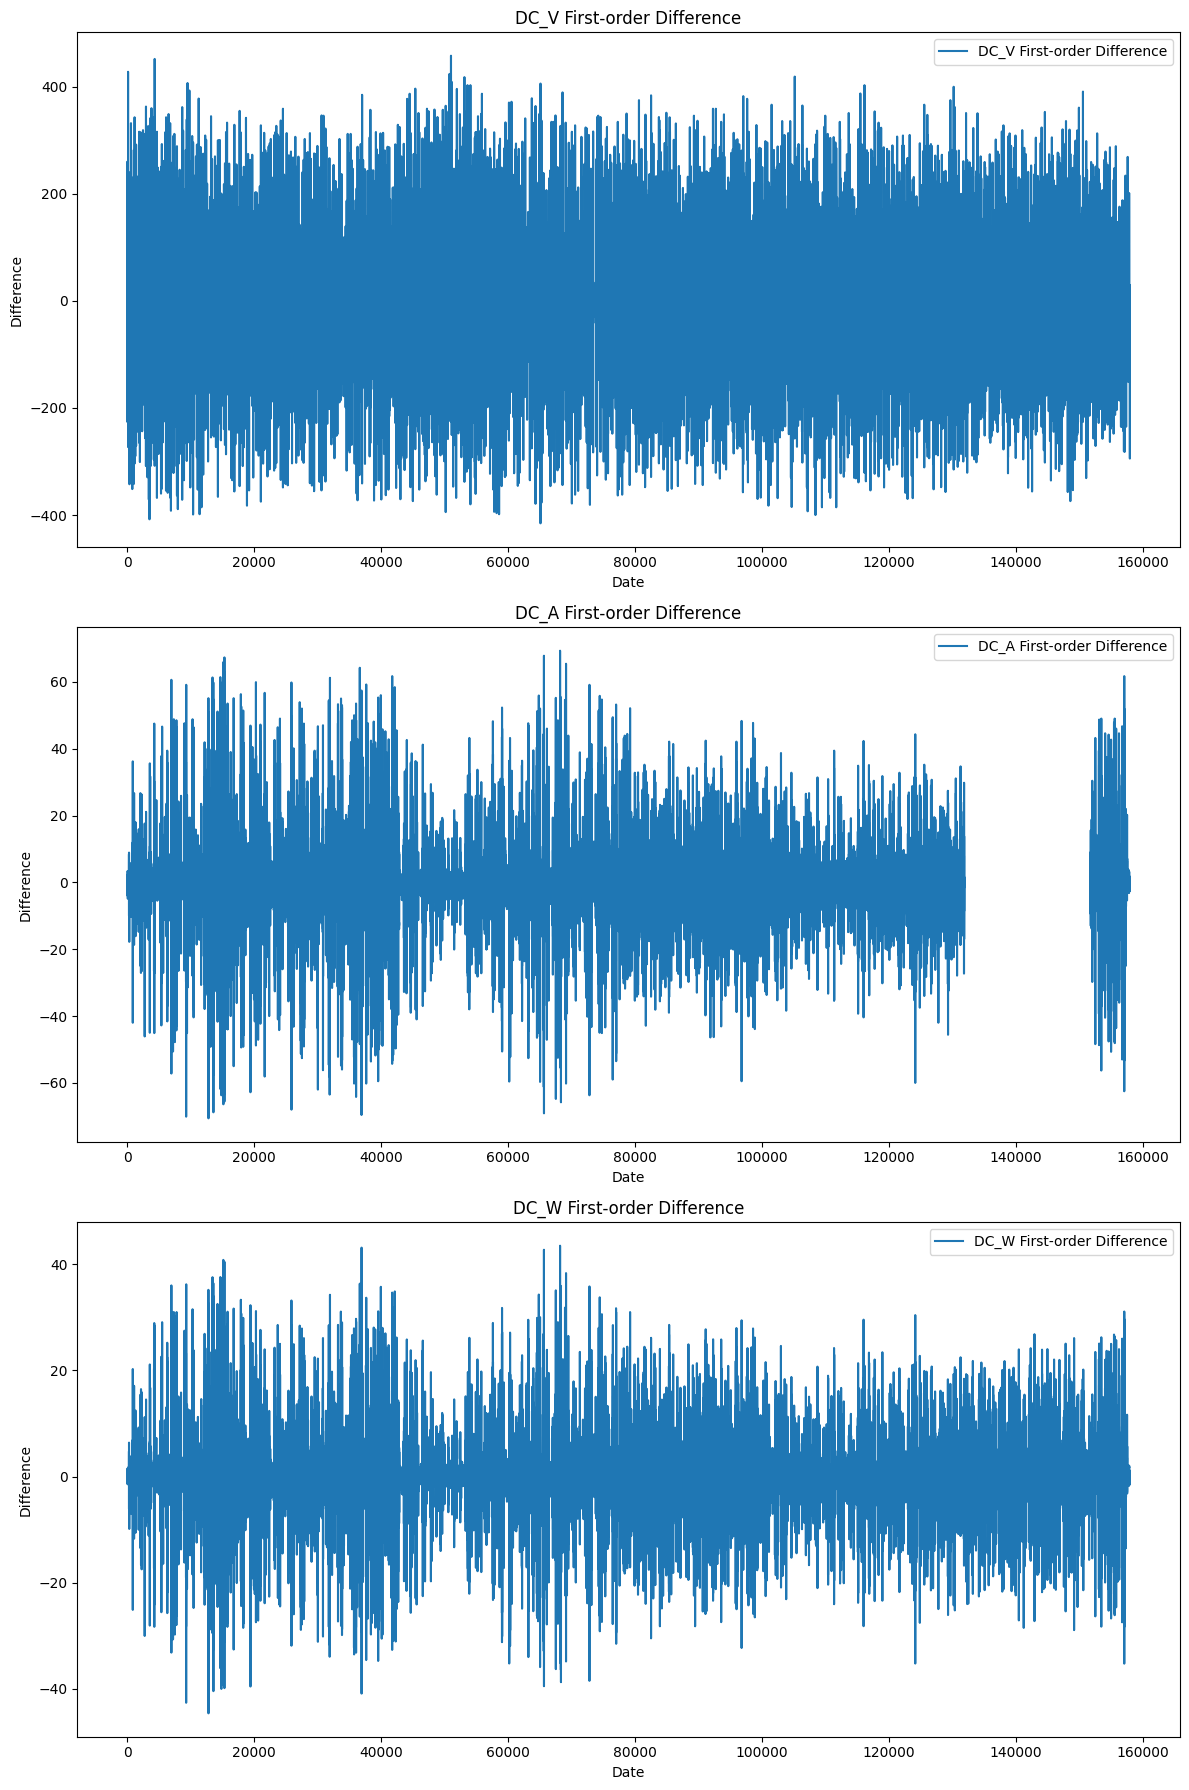

Partial Autocorrelation for DC_V: [ 1.         -0.26125759 -0.04106754 -0.0309503  -0.04670883 -0.07217516
 -0.08234143 -0.07872411 -0.06560386 -0.05347377 -0.05153092 -0.04681383
 -0.04199267 -0.04502549 -0.04356526 -0.04151514 -0.04405316 -0.0398574
 -0.03929035 -0.03842981 -0.03651655]
Partial Autocorrelation for DC_A: [ 1.         -0.29771804 -0.13264636 -0.05911397 -0.01730442  0.00577568
  0.00128077  0.02377646  0.02557862  0.04717312  0.03059417  0.055627
  0.02995039  0.03539675  0.04099378  0.03121417  0.02965341  0.022302
  0.02004669  0.01699548  0.02969666]
Partial Autocorrelation for DC_W: [ 1.         -0.3117262  -0.13978343 -0.06411772 -0.02479686  0.00186605
  0.00264821  0.01949181  0.02498148  0.04503209  0.03282463  0.05333748
  0.03176533  0.03246792  0.03645345  0.03144794  0.03080845  0.02249533
  0.02093869  0.01820904  0.02780532]


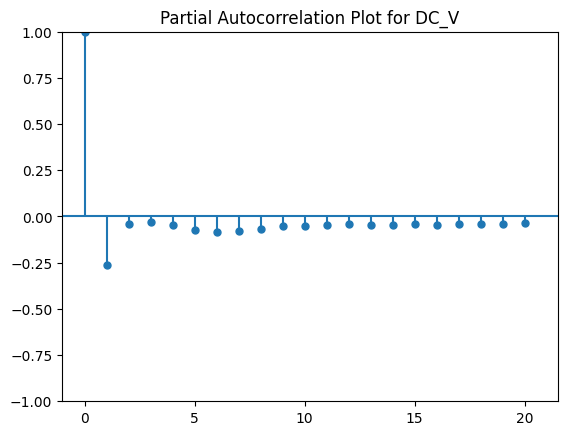

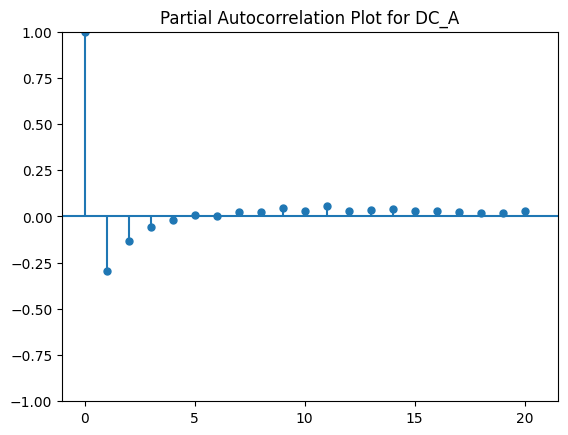

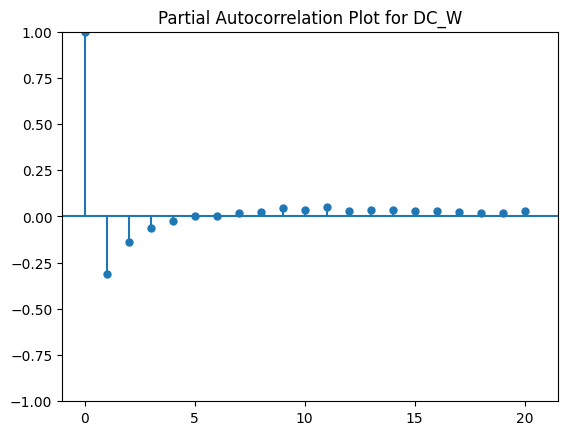

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv')

# Define the columns of interest
columns_of_interest = ['DC_V', 'DC_A', 'DC_W']

# Ensure stationarity of the time series by calculating first-order difference
for column in columns_of_interest:
    data[column + '_diff'] = data[column].diff()

# Plot the first-order difference
plt.figure(figsize=(12, 6*len(columns_of_interest)))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(len(columns_of_interest), 1, i)
    plt.plot(data.index, data[column + '_diff'], label=f'{column} First-order Difference')
    plt.title(f'{column} First-order Difference')
    plt.xlabel('Date')
    plt.ylabel('Difference')
    plt.legend()
plt.tight_layout()
plt.show()

# Calculate partial autocorrelation lag using pacf() function
for column in columns_of_interest:
    pacf_result = pacf(data[column + '_diff'].dropna(), nlags=20)
    print(f'Partial Autocorrelation for {column}: {pacf_result}')

# Plot partial autocorrelation using plot_pacf() function
for column in columns_of_interest:
    plot_pacf(data[column + '_diff'].dropna(), lags=20, title=f'Partial Autocorrelation Plot for {column}')
    plt.show()


**Question 4** Using solar power generation data, pv_2years_eng, implement it as a moving average (MA), and display the moving average prediction results as plot().

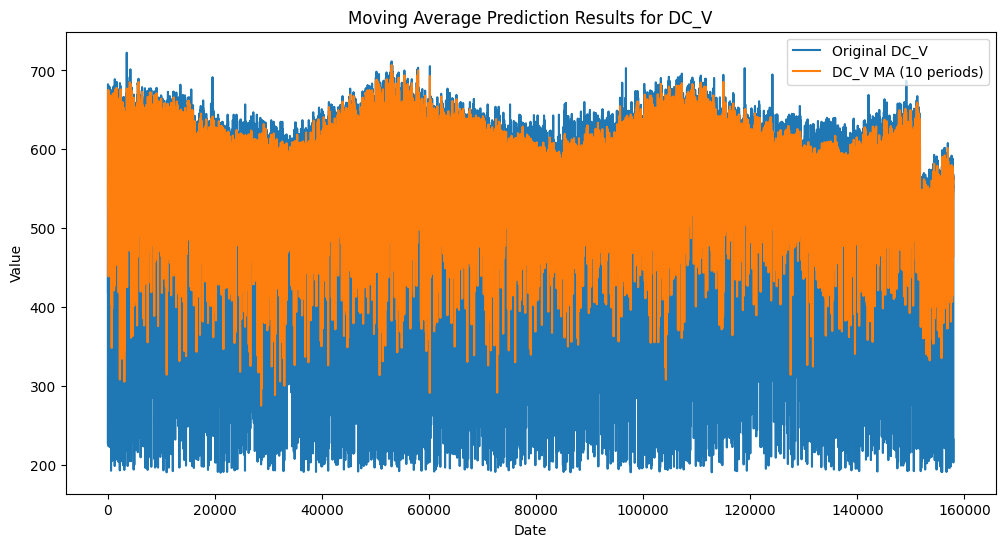

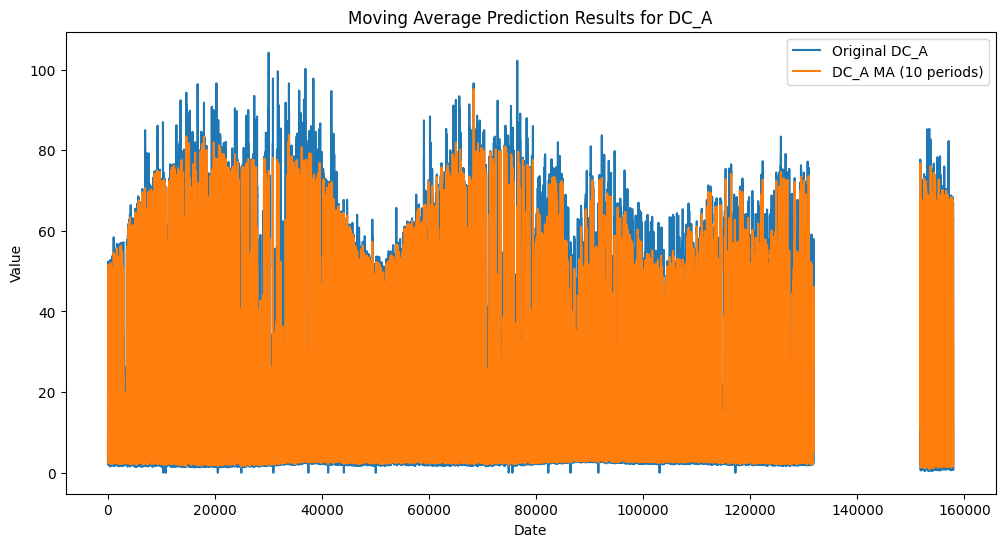

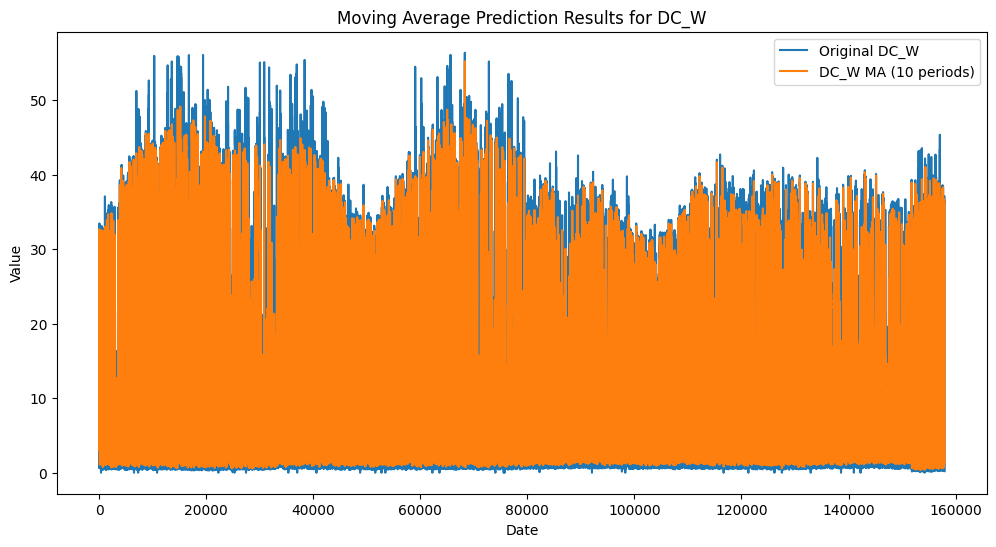

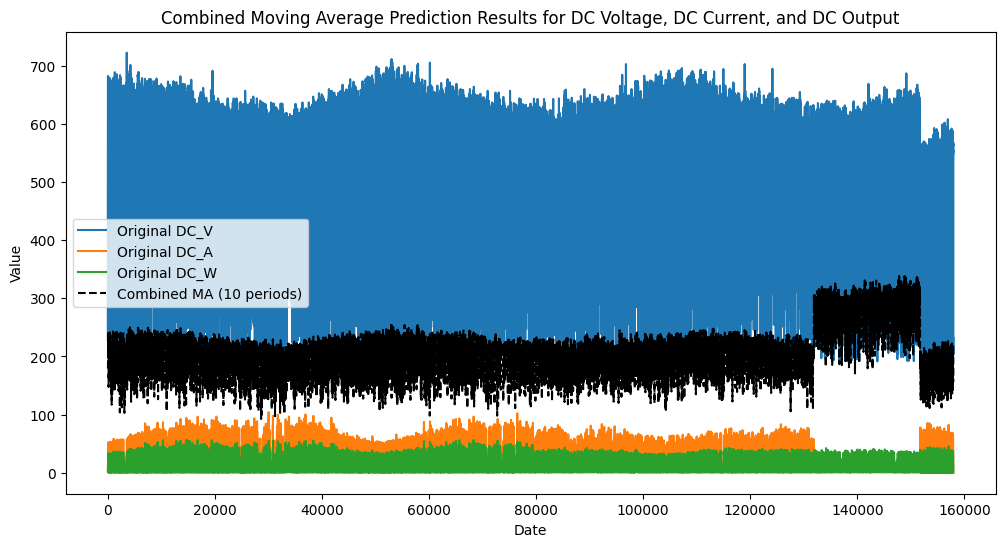

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv')

# Define the columns of interest
columns_of_interest = ['DC_V', 'DC_A', 'DC_W']

# Plot original data and moving average for each column separately
for column in columns_of_interest:
    plt.figure(figsize=(12, 6))

    # Plot original data
    plt.plot(data.index, data[column], label=f'Original {column}')

    # Implement moving average (MA)
    window_size = 10  # Specify the window size for the moving average
    ma = data[column].rolling(window=window_size).mean()
    plt.plot(data.index, ma, label=f'{column} MA ({window_size} periods)')

    plt.title(f'Moving Average Prediction Results for {column}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Define the columns of interest
columns_of_interest = ['DC_V', 'DC_A', 'DC_W']

# Plot original data and combined moving average for all columns
plt.figure(figsize=(12, 6))

# Plot original data for each column
for column in columns_of_interest:
    plt.plot(data.index, data[column], label=f'Original {column}')

# Calculate and plot combined moving average
window_size = 10  # Specify the window size for the moving average
combined_ma = data[columns_of_interest].rolling(window=window_size).mean().mean(axis=1)
plt.plot(data.index, combined_ma, label=f'Combined MA ({window_size} periods)', color='black', linestyle='--')

plt.title('Combined Moving Average Prediction Results for DC Voltage, DC Current, and DC Output')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

**Question 5** Using solar power generation data, pv_2years_eng, implement triple exponential smoothing and display the triple exponential smoothing results with plot().

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/opt/conda/lib/python3.10/site-

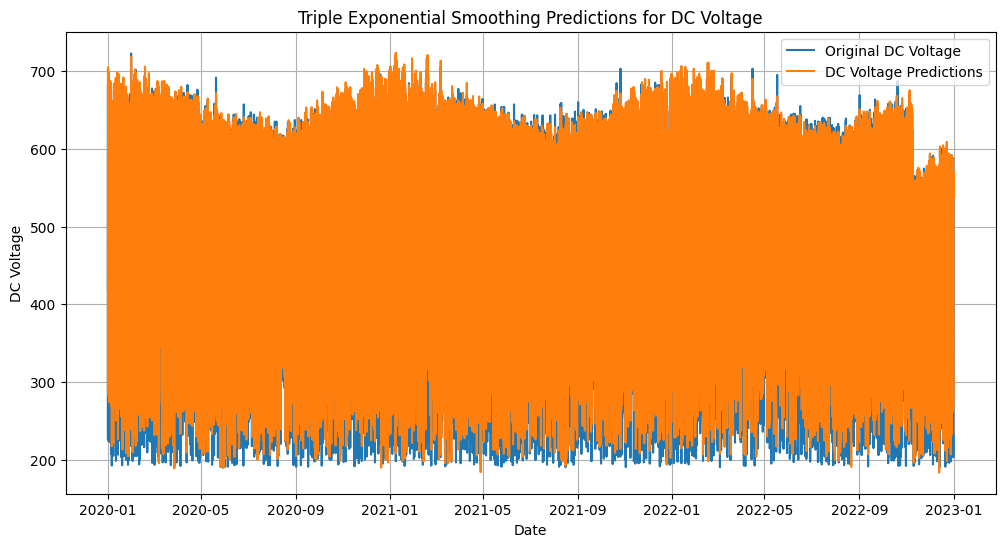

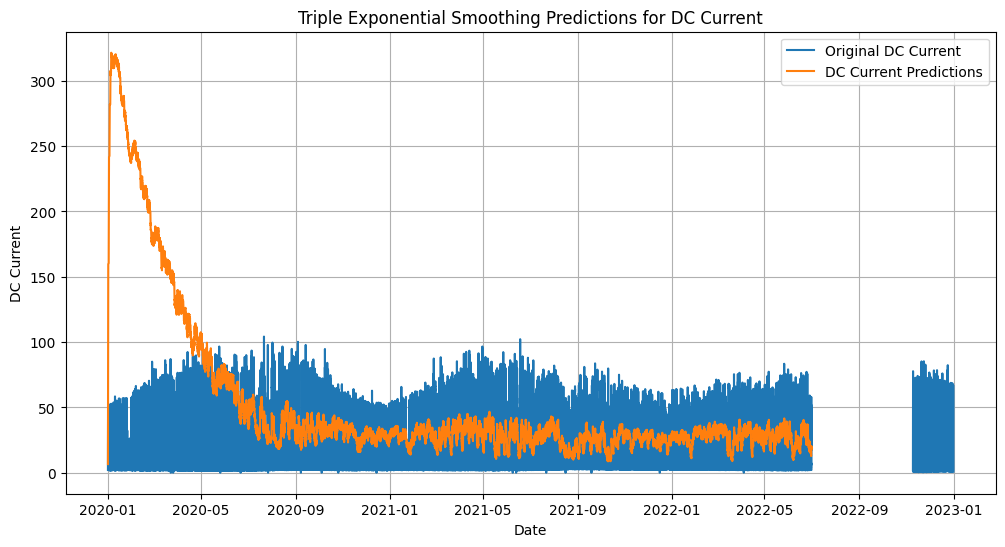

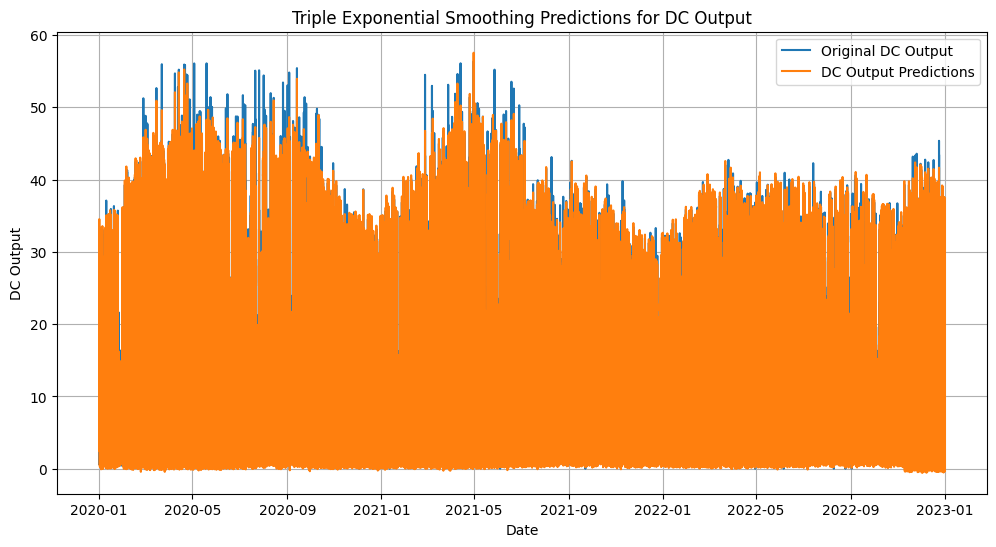

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv', parse_dates=['date'])

# Prepare the data
data.set_index('date', inplace=True)

# Define the columns of interest
columns_of_interest = ['DC_V', 'DC_A', 'DC_W']

# Implement triple exponential smoothing (Holt-Winters method) for each column
predictions = {}

for column in columns_of_interest:
    model = ExponentialSmoothing(data[column], trend='add', seasonal='add', seasonal_periods=12)
    result = model.fit()
    predictions[column] = result.predict(start=data.index[0], end=data.index[-1])

# Plot the predictions for each column separately
plt.figure(figsize=(12, 6))

# Plot DC Voltage predictions
plt.plot(data.index, data['DC_V'], label='Original DC Voltage')
plt.plot(predictions['DC_V'].index, predictions['DC_V'], label='DC Voltage Predictions')

plt.title('Triple Exponential Smoothing Predictions for DC Voltage')
plt.xlabel('Date')
plt.ylabel('DC Voltage')
plt.legend()
plt.grid(True)
plt.show()

# Plot DC Current predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['DC_A'], label='Original DC Current')
plt.plot(predictions['DC_A'].index, predictions['DC_A'], label='DC Current Predictions')

plt.title('Triple Exponential Smoothing Predictions for DC Current')
plt.xlabel('Date')
plt.ylabel('DC Current')
plt.legend()
plt.grid(True)
plt.show()

# Plot DC Output predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['DC_W'], label='Original DC Output')
plt.plot(predictions['DC_W'].index, predictions['DC_W'], label='DC Output Predictions')

plt.title('Triple Exponential Smoothing Predictions for DC Output')
plt.xlabel('Date')
plt.ylabel('DC Output')
plt.legend()
plt.grid(True)
plt.show()

**Question 6** Using solar power generation data, pv_2years_eng, implement autoregressive (AR) and display the autoregressive (AR) results in plot().

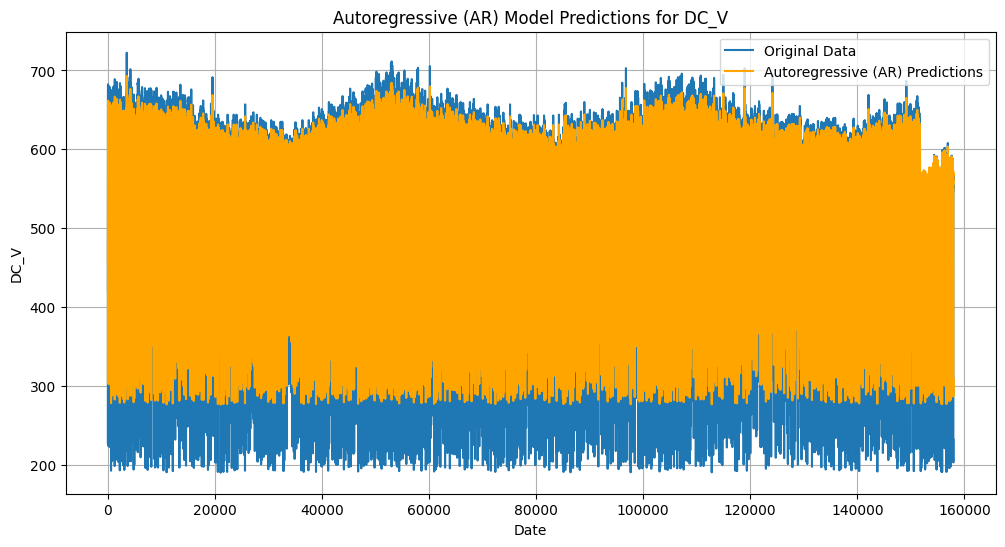

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_inde

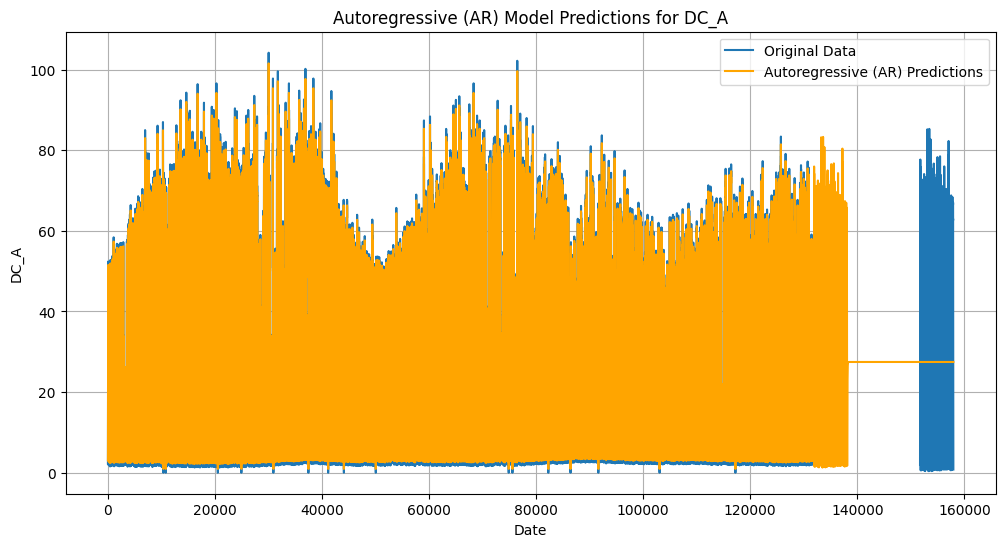

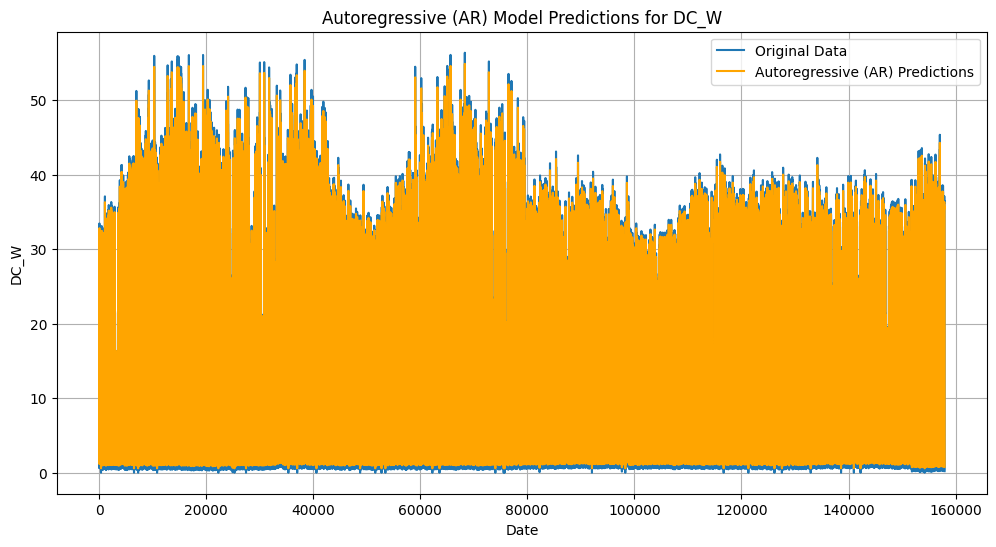

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv')

# Define the columns of interest
columns_of_interest = ['DC_V', 'DC_A', 'DC_W']

# Plot autoregressive (AR) results for each column
for column in columns_of_interest:
    # Fit autoregressive (AR) model
    model = AutoReg(data[column].dropna(), lags=1)  # Using lag 1 for simplicity
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.predict(start=1, end=len(data[column]))

    # Plot original data and autoregressive (AR) predictions
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[column], label='Original Data')
    plt.plot(data.index, predictions, label='Autoregressive (AR) Predictions', color='orange')

    plt.title(f'Autoregressive (AR) Model Predictions for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()


# AC Group
* 'AC_V_RS': 'AC voltage (RS)'
* 'AC_V_ST': 'AC voltage (ST)'  
* 'AC_V_TR': 'AC voltage (TR)'  
* 'AC_A_R': 'AC current (R)'  
* 'AC_A_S': 'AC current (S)'  
* 'AC_A_T': 'AC current (T)'
* 'AC_W': 'AC output'
* 'AC_TOT': 'AC cumulative power generation'
* 'AC_FREQ': 'AC frequency'
* 'AC_POW': 'AC power factor'

**Question 1**
Using solar power generation data, pv_2years_eng, decompose the time series into trend, seasonal, and residual components and display them with plot(). At this time, decompose using the additive vs. multiplicative model and present the results.

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv')

# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Set the date column as the index
data.set_index('date', inplace=True)

# Define the columns of interest
columns_of_interest = ['AC_V_RS', 'AC_V_ST', 'AC_V_TR', 'AC_A_R', 'AC_A_S', 'AC_A_T', 'AC_W', 'AC_TOT', 'AC_FREQ', 'AC_POW']

# Specify frequency
freq = 'H'

# Decompose the time series using both additive and multiplicative models
for column in columns_of_interest:
    try:
        # Additive decomposition
        decomposition_add = seasonal_decompose(data[column], model='additive', period=24, extrapolate_trend='freq')

        # Plot the decomposed components
        plt.figure(figsize=(12, 12))
        plt.subplot(3, 1, 1)
        plt.plot(decomposition_add.trend, label='Additive Trend')
        plt.title('Additive Trend')
        plt.legend()

        plt.subplot(3, 1, 2)
        plt.plot(decomposition_add.seasonal, label='Additive Seasonal')
        plt.title('Additive Seasonal')
        plt.legend()

        plt.subplot(3, 1, 3)
        plt.plot(decomposition_add.resid, label='Additive Residual')
        plt.title('Additive Residual')
        plt.legend()

        plt.subplots_adjust(hspace=0.5)  # Adjust the spacing between subplots

        plt.suptitle(f'Decomposition of {data[column].name} (Additive Model)', fontsize=12)
        plt.show()

    except ValueError as e:
        print(f"Additive decomposition couldn't be performed for column {column}: {str(e)}")

    try:
        # Multiplicative decomposition
        decomposition_mul = seasonal_decompose(data[column], model='multiplicative', period=24, extrapolate_trend='freq')

        # Plot the decomposed components
        plt.figure(figsize=(12, 12))
        plt.subplot(3, 1, 1)
        plt.plot(decomposition_mul.trend, label='Multiplicative Trend')
        plt.title('Multiplicative Trend')
        plt.legend()

        plt.subplot(3, 1, 2)
        plt.plot(decomposition_mul.seasonal, label='Multiplicative Seasonal')
        plt.title('Multiplicative Seasonal')
        plt.legend()

        plt.subplot(3, 1, 3)
        plt.plot(decomposition_mul.resid, label='Multiplicative Residual')
        plt.title('Multiplicative Residual')
        plt.legend()

        plt.subplots_adjust(hspace=0.5)  # Adjust the spacing between subplots

        plt.suptitle(f'Decomposition of {data[column].name} (Multiplicative Model)', fontsize=10)
        plt.show()

    except ValueError as e:
        print(f"Multiplicative decomposition couldn't be performed for column {column}: {str(e)}")


**Question 2**
Using solar power generation data, pv_2years_eng, to ensure stationarity of the time series, calculate the first-order difference and calculate the autocorrelation lag (lag) using the Statsmodels acf() function and plot_acf(). Find .

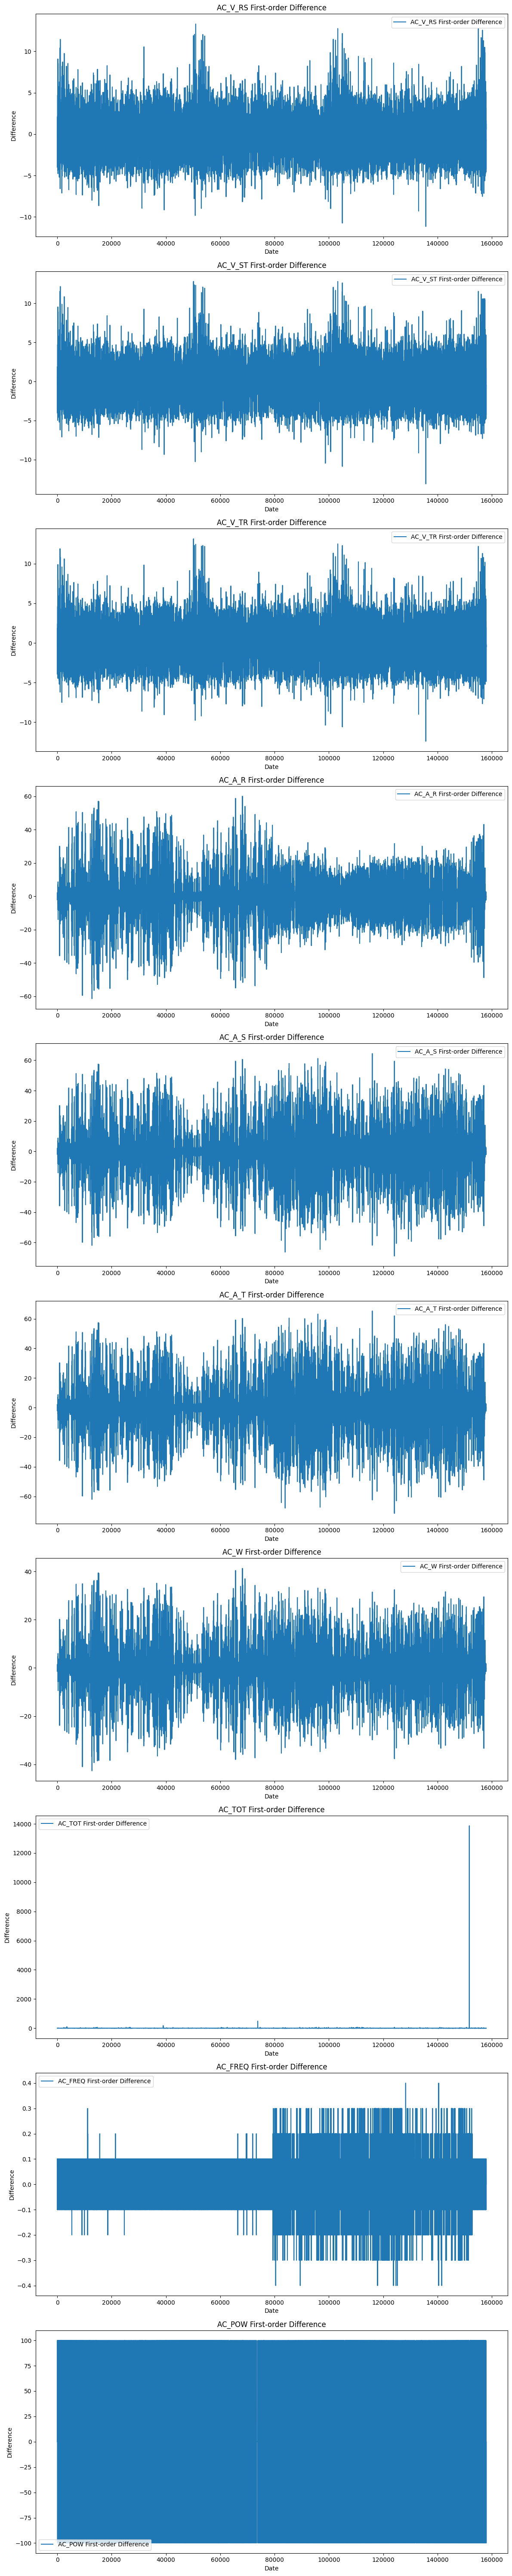

Autocorrelation for AC_V_RS: [ 1.         -0.19817222 -0.04278123 -0.00195656 -0.00335043 -0.01300771
 -0.00388883  0.00721671 -0.00374471 -0.00624741 -0.0102632   0.00122472
 -0.00774637 -0.00773363  0.00157715 -0.00921657 -0.01197022 -0.00466464
 -0.00565012 -0.00942457  0.00318715]
Autocorrelation for AC_V_ST: [ 1.00000000e+00 -2.01834512e-01 -4.18261650e-02 -4.74898509e-03
 -2.49194952e-03 -1.26325722e-02 -6.35371601e-04  9.16316367e-03
 -3.75750089e-03 -6.32200746e-03 -6.84484061e-03  1.56386900e-03
 -7.65633405e-03 -6.92091913e-03  7.63477393e-04 -7.27182193e-03
 -1.06914173e-02 -5.38480587e-03 -4.34845832e-03 -6.31364007e-03
  1.39215807e-03]
Autocorrelation for AC_V_TR: [ 1.         -0.20488245 -0.04558552 -0.00348389 -0.00292655 -0.01474592
 -0.00102115  0.00915642 -0.0034815  -0.0049881  -0.00808142  0.00226903
 -0.00747968 -0.00615624  0.00201538 -0.00630618 -0.01064023 -0.00544918
 -0.0033284  -0.00721542  0.00407986]
Autocorrelation for AC_A_R: [ 1.         -0.37162909 -0.

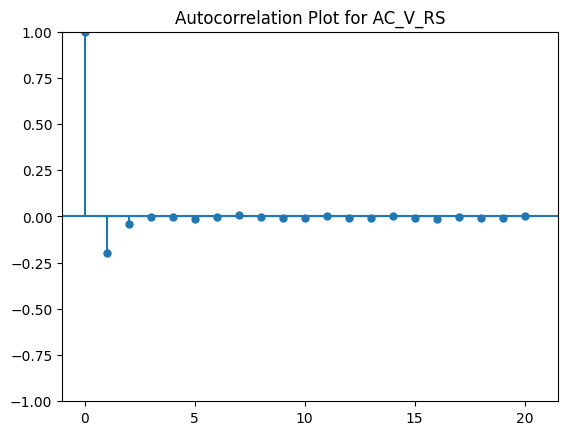

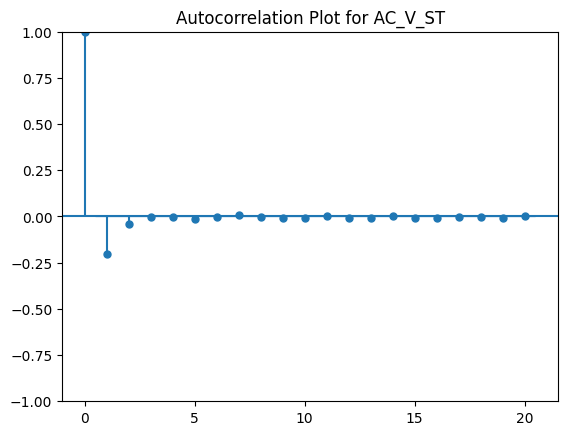

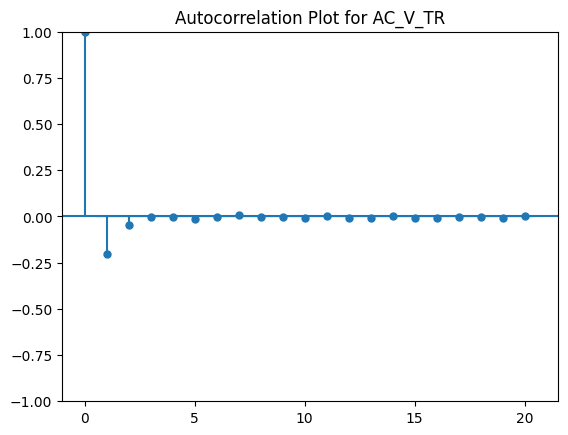

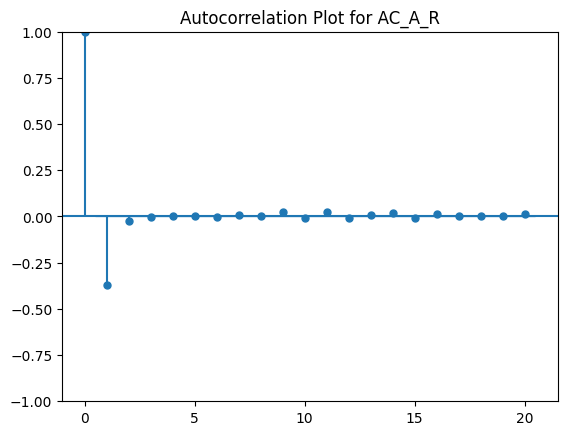

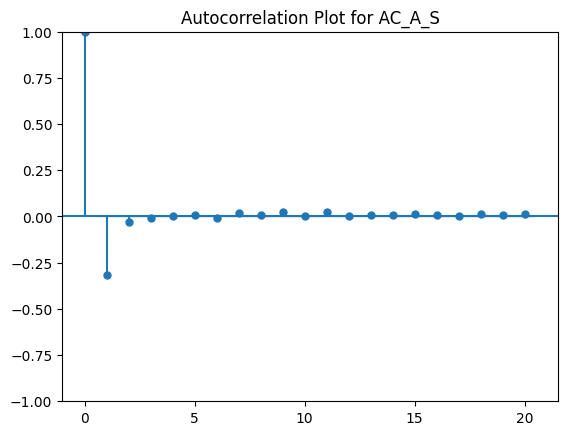

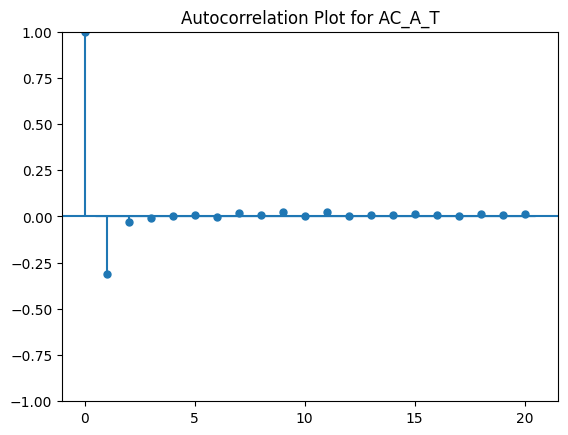

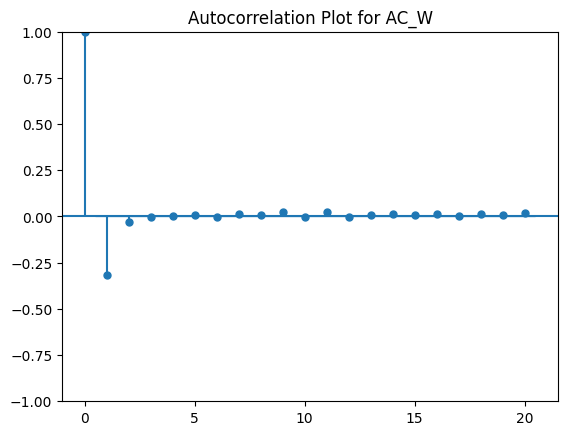

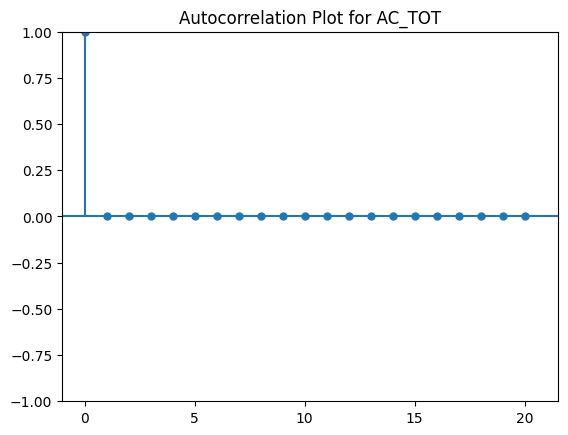

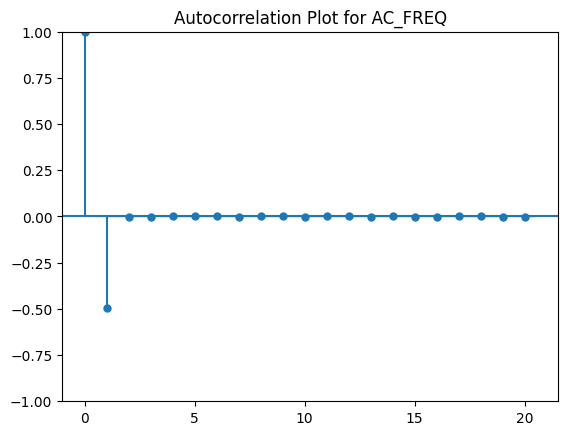

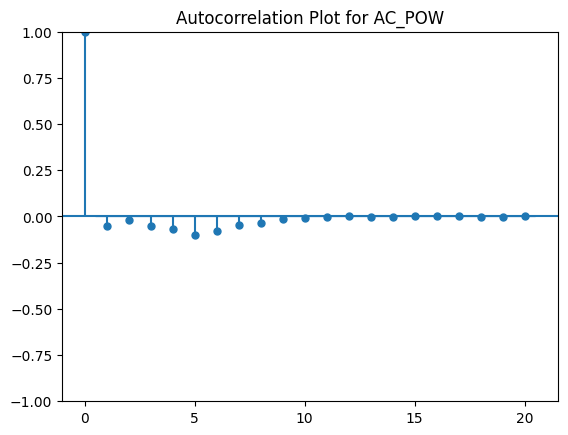

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv')

# Define the columns of interest
columns_of_interest = ['AC_V_RS', 'AC_V_ST', 'AC_V_TR', 'AC_A_R', 'AC_A_S',
                       'AC_A_T', 'AC_W', 'AC_TOT', 'AC_FREQ', 'AC_POW']

# Ensure stationarity of the time series by calculating first-order difference
for column in columns_of_interest:
    data[column + '_diff'] = data[column].diff()

# Plot the first-order difference with larger figure size and increased spacing
plt.figure(figsize=(12, 6*len(columns_of_interest)))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(len(columns_of_interest), 1, i)
    plt.plot(data.index, data[column + '_diff'], label=f'{column} First-order Difference')
    plt.title(f'{column} First-order Difference')
    plt.xlabel('Date')
    plt.ylabel('Difference')
    plt.legend()
plt.tight_layout()
plt.show()

# Calculate autocorrelation lag using acf() function
for column in columns_of_interest:
    acf_result = acf(data[column + '_diff'].dropna(), nlags=20)
    print(f'Autocorrelation for {column}: {acf_result}')

# Plot autocorrelation using plot_acf() function
for column in columns_of_interest:
    plot_acf(data[column + '_diff'].dropna(), lags=20, title=f'Autocorrelation Plot for {column}')
    plt.show()

**Question 3** Using solar power generation data, pv_2years_eng, to ensure stationarity of the time series, calculate the first-order difference and calculate the partial autocorrelation lag (lag) using the Statsmodels pacf() function and plot_acf(). ).

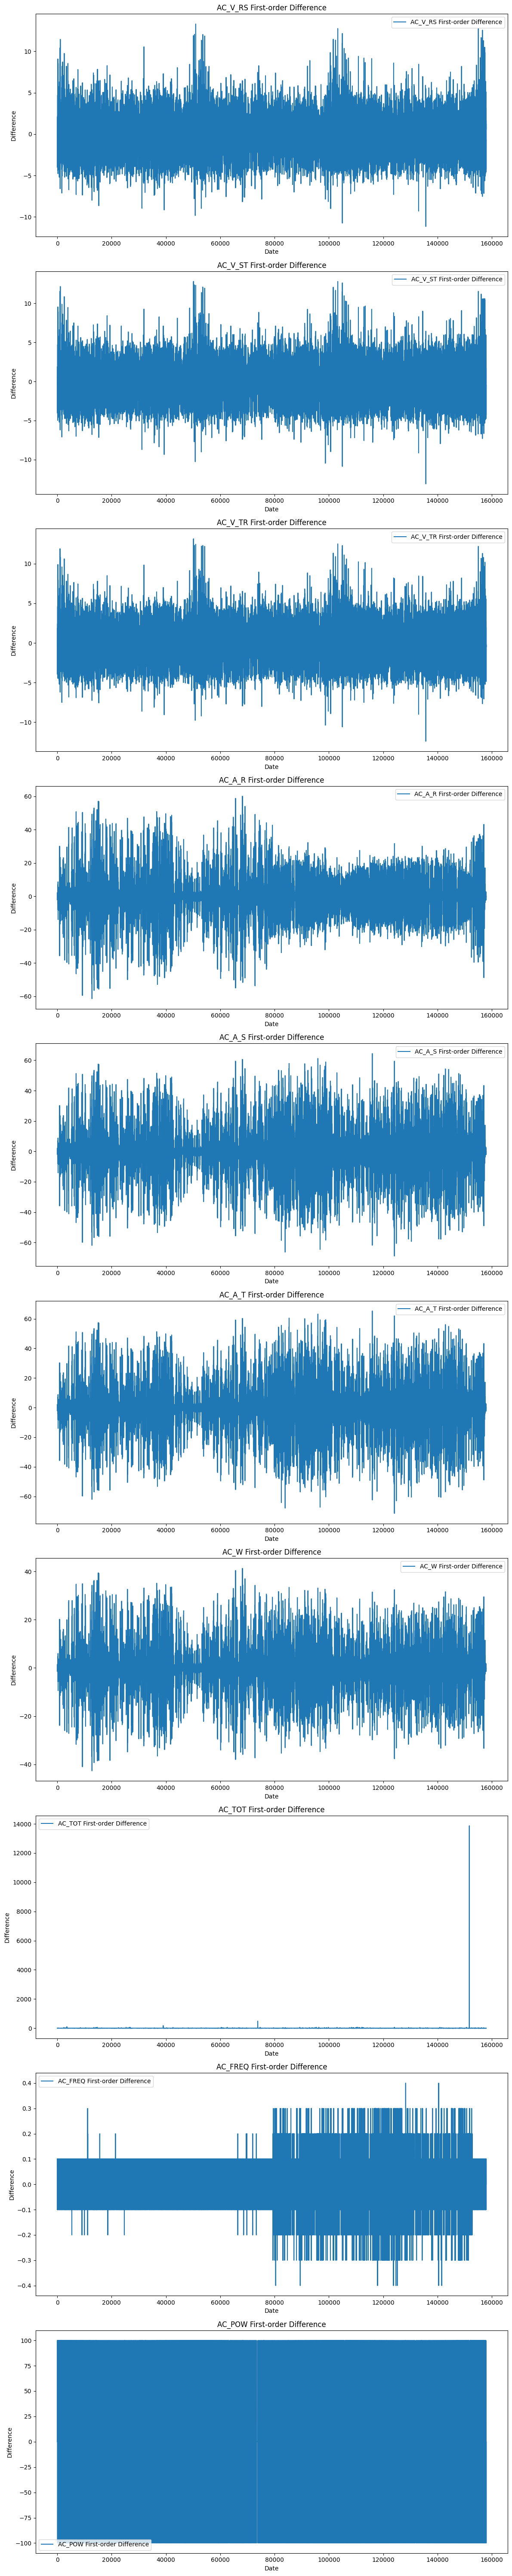

Partial Autocorrelation for AC_V_RS: [ 1.         -0.19817348 -0.08540873 -0.02944753 -0.01420616 -0.01902809
 -0.01224939  0.00171741 -0.0034227  -0.00788772 -0.01461352 -0.0054935
 -0.01096941 -0.01309564 -0.0048781  -0.01262948 -0.01831516 -0.01372029
 -0.0131585  -0.01640693 -0.00489947]
Partial Autocorrelation for AC_V_ST: [ 1.         -0.20183579 -0.0860707  -0.03286223 -0.01480412 -0.01907316
 -0.00895703  0.0051933  -0.00177046 -0.00715984 -0.01065259 -0.00337481
 -0.00974567 -0.01179696 -0.00514125 -0.01052065 -0.01602875 -0.01341874
 -0.01153534 -0.01234169 -0.00476217]
Partial Autocorrelation for AC_V_TR: [ 1.         -0.20488375 -0.09140019 -0.03410865 -0.01603844 -0.02189248
 -0.01081744  0.00411676 -0.00194913 -0.00585819 -0.01155016 -0.00312088
 -0.0095527  -0.01096807 -0.00361047 -0.00894451 -0.01533292 -0.01332773
 -0.01060155 -0.01298033 -0.00234256]
Partial Autocorrelation for AC_A_R: [ 1.         -0.37163144 -0.1891873  -0.1008806  -0.04880585 -0.01799087
 -0.007492

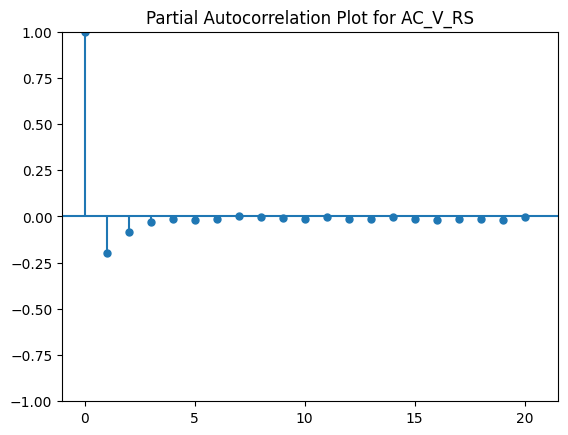

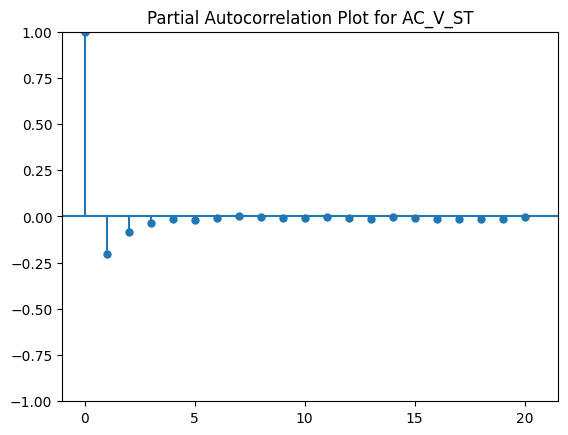

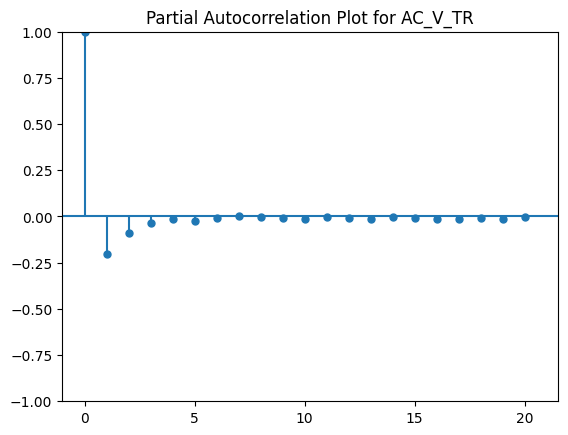

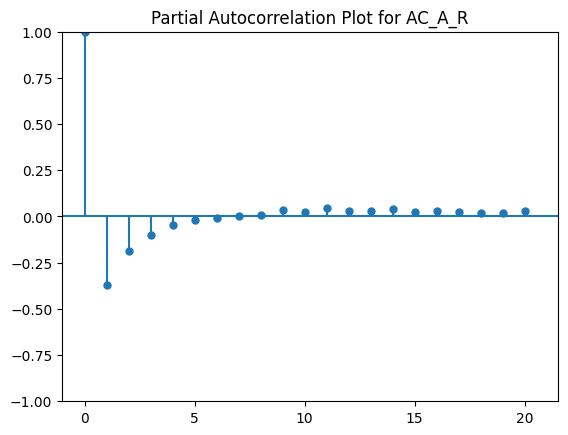

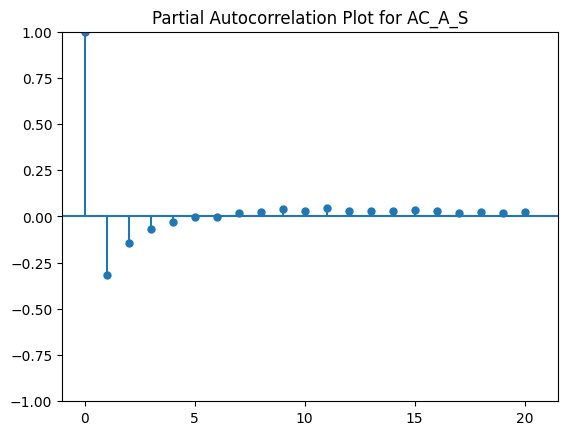

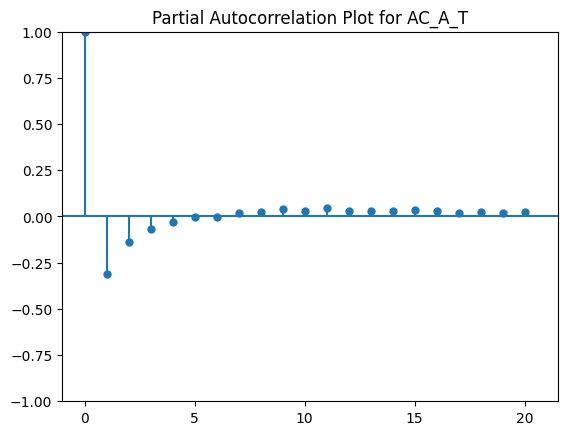

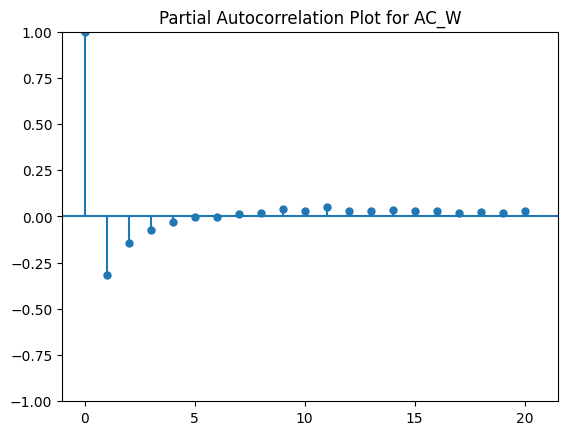

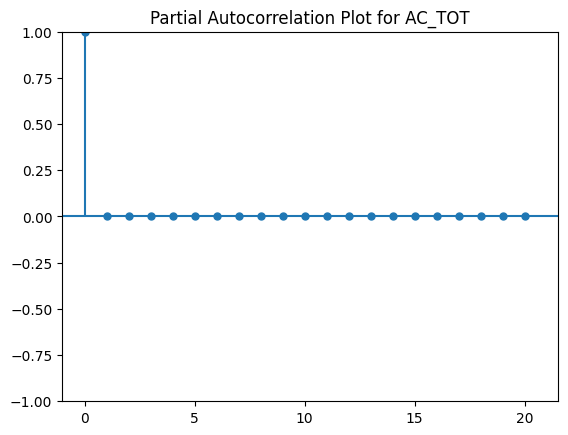

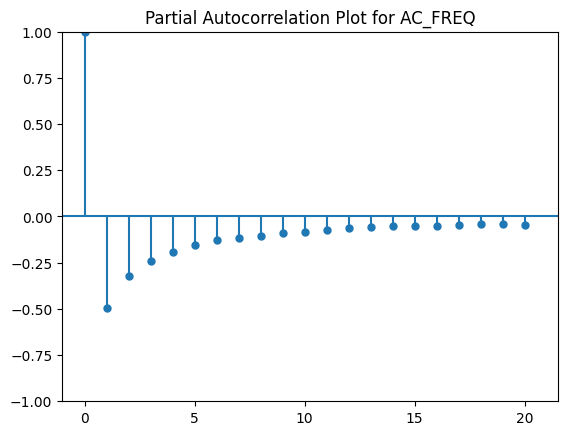

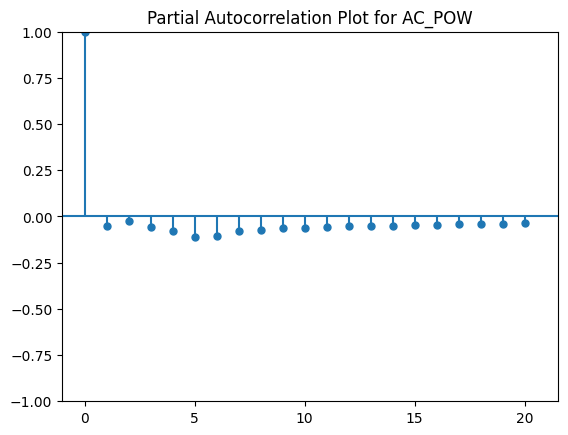

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv')

# Define the columns of interest
columns_of_interest = ['AC_V_RS', 'AC_V_ST', 'AC_V_TR', 'AC_A_R', 'AC_A_S',
                       'AC_A_T', 'AC_W', 'AC_TOT', 'AC_FREQ', 'AC_POW']

# Ensure stationarity of the time series by calculating first-order difference
for column in columns_of_interest:
    data[column + '_diff'] = data[column].diff()

# Plot the first-order difference
plt.figure(figsize=(12, 6*len(columns_of_interest)))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(len(columns_of_interest), 1, i)
    plt.plot(data.index, data[column + '_diff'], label=f'{column} First-order Difference')
    plt.title(f'{column} First-order Difference')
    plt.xlabel('Date')
    plt.ylabel('Difference')
    plt.legend()
plt.tight_layout()
plt.show()

# Calculate partial autocorrelation lag using pacf() function
for column in columns_of_interest:
    pacf_result = pacf(data[column + '_diff'].dropna(), nlags=20)
    print(f'Partial Autocorrelation for {column}: {pacf_result}')

# Plot partial autocorrelation using plot_pacf() function
for column in columns_of_interest:
    plot_pacf(data[column + '_diff'].dropna(), lags=20, title=f'Partial Autocorrelation Plot for {column}')
    plt.show()


**Question 4** Using solar power generation data, pv_2years_eng, implement it as a moving average (MA), and display the moving average prediction results as plot().

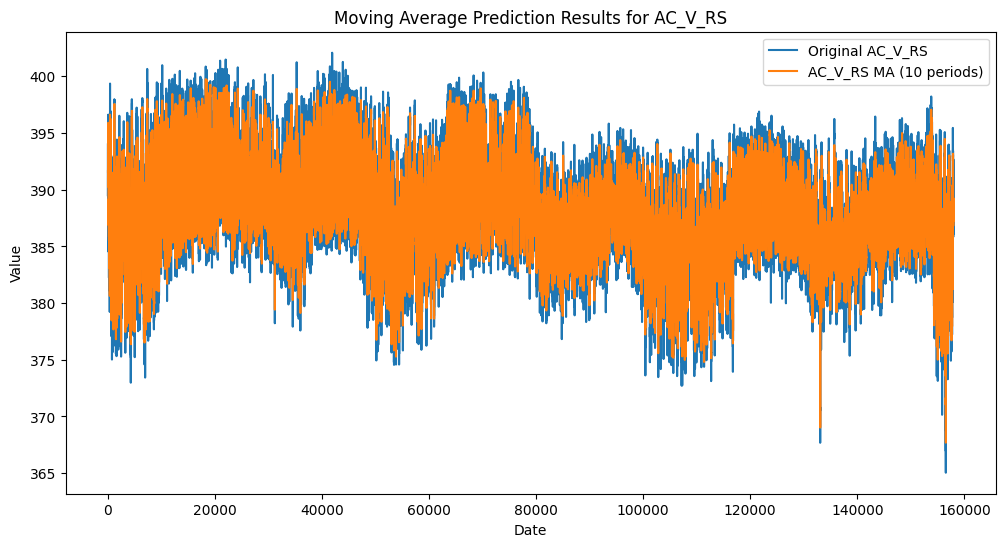

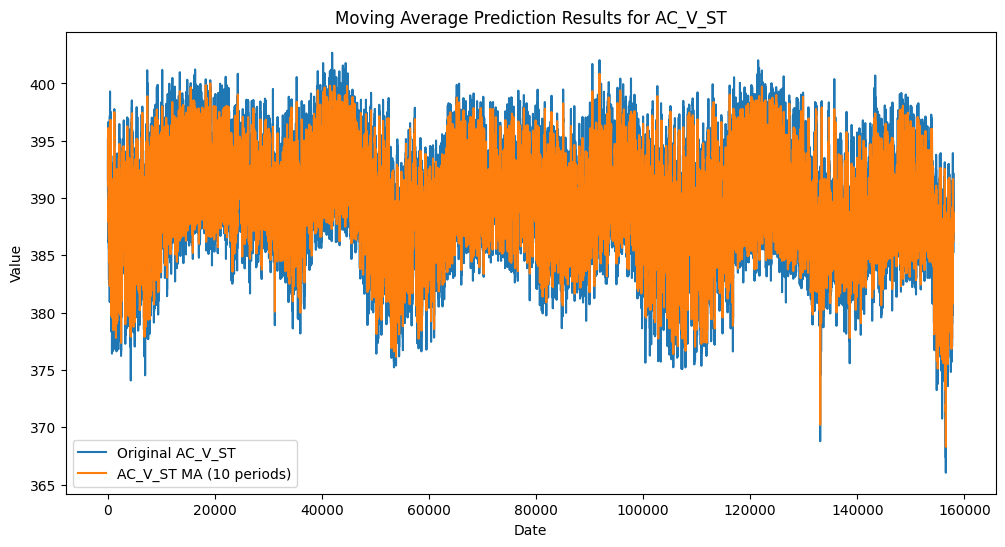

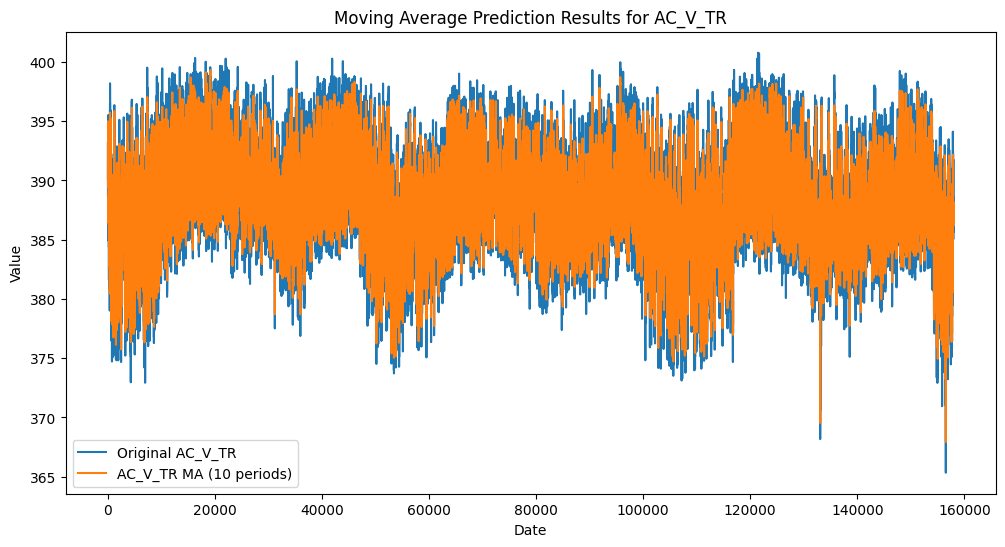

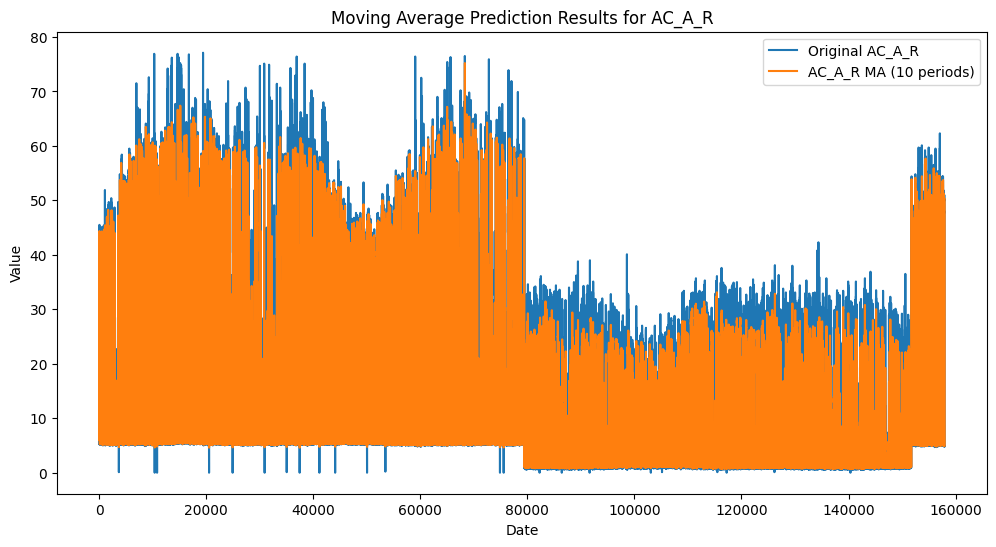

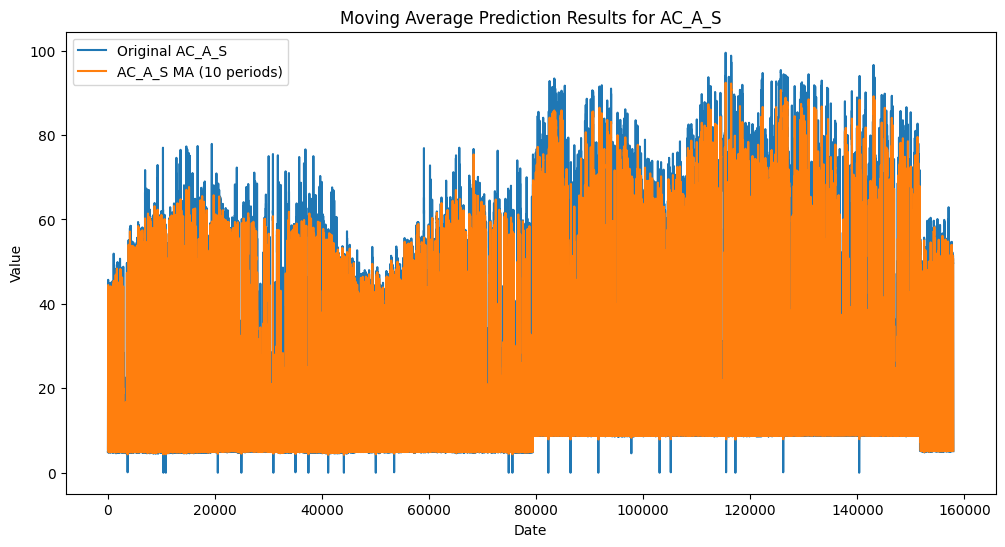

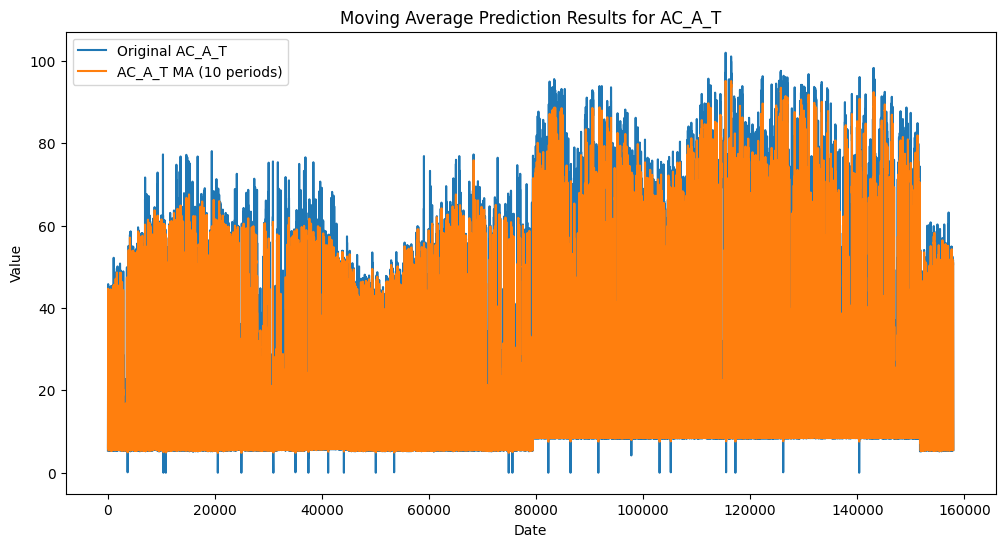

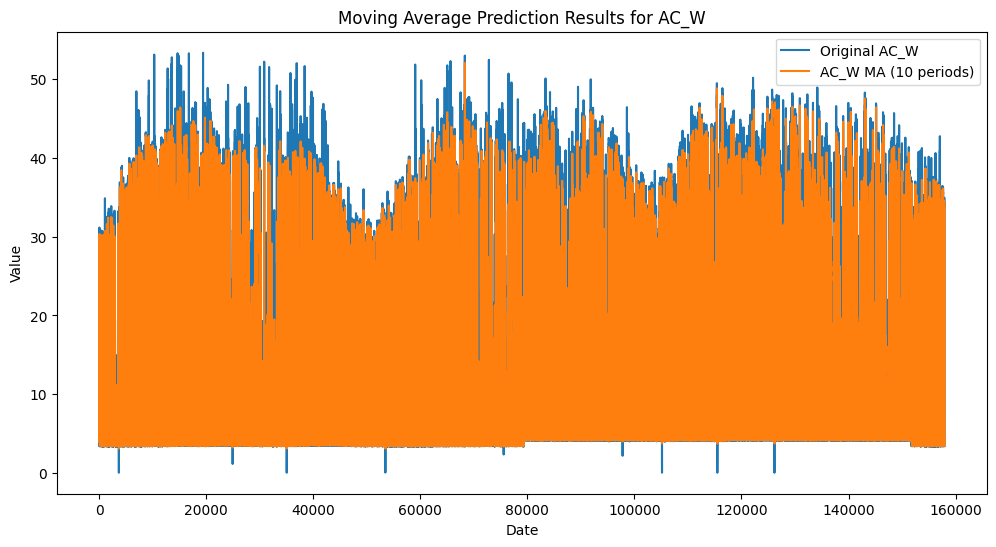

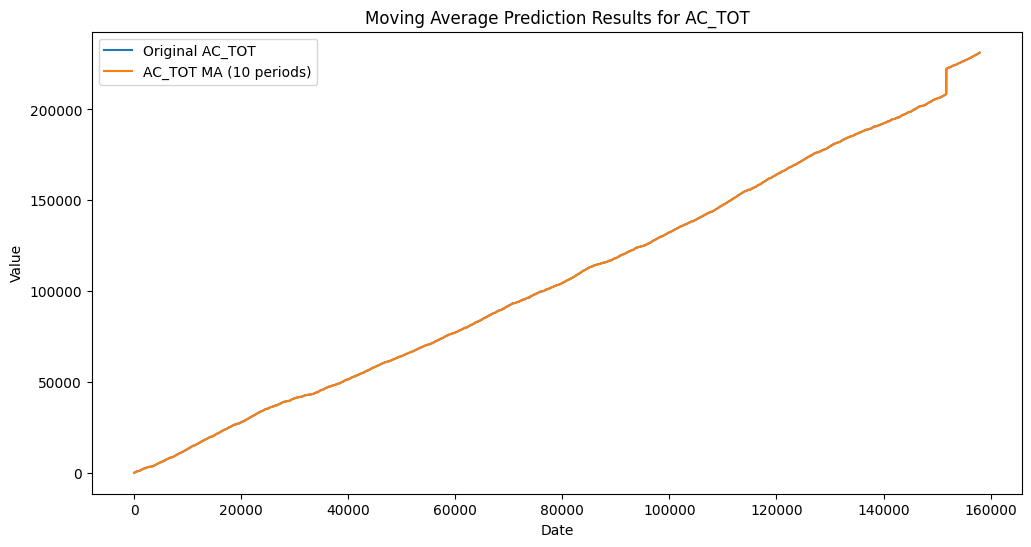

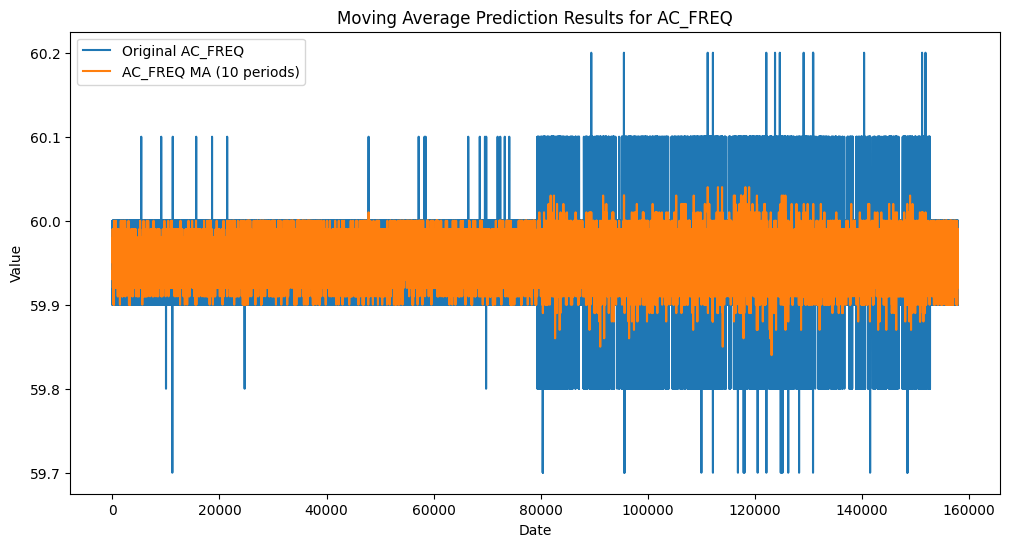

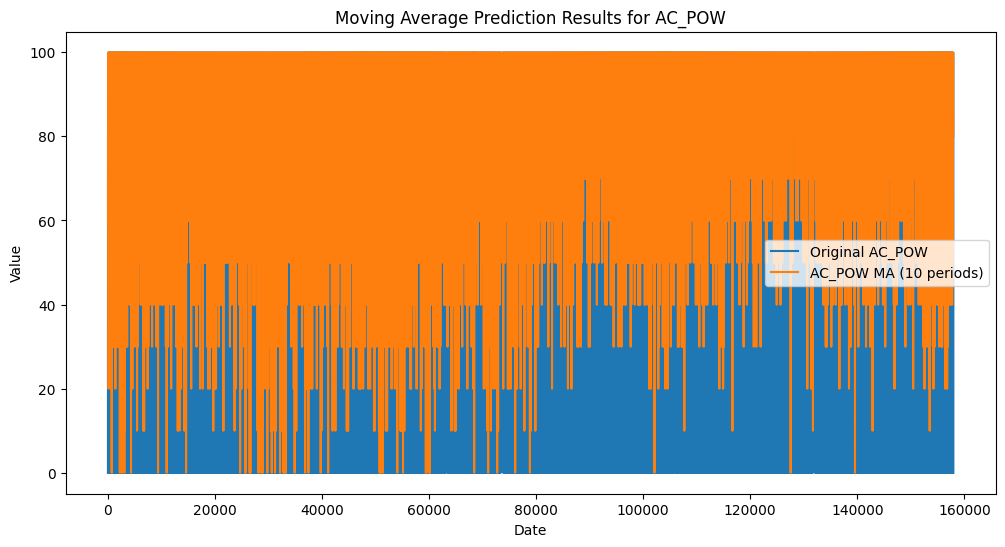

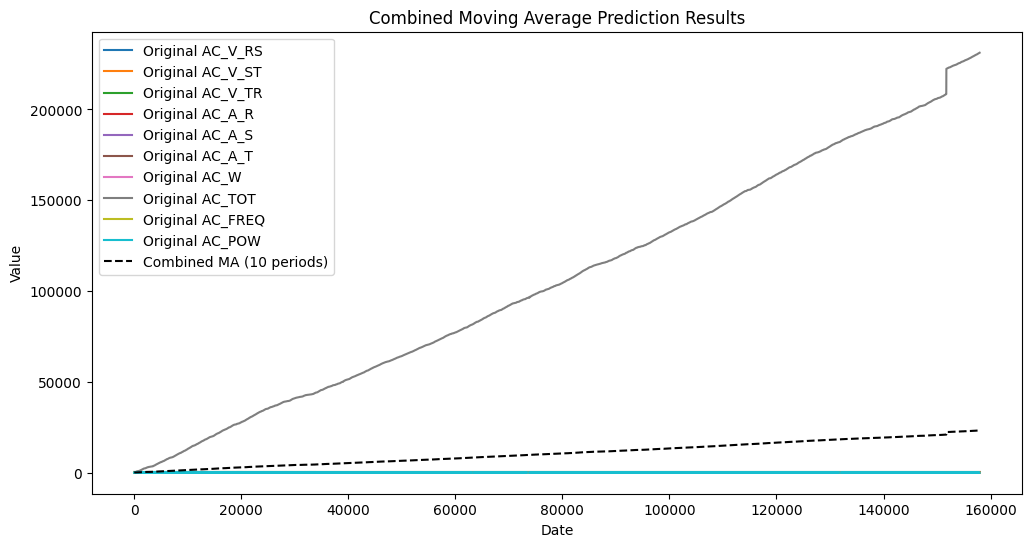

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv')

# Define the columns of interest
columns_of_interest = ['AC_V_RS', 'AC_V_ST', 'AC_V_TR', 'AC_A_R', 'AC_A_S',
                       'AC_A_T', 'AC_W', 'AC_TOT', 'AC_FREQ', 'AC_POW']

# Plot original data and moving average for each column separately
for column in columns_of_interest:
    plt.figure(figsize=(12, 6))

    # Plot original data
    plt.plot(data.index, data[column], label=f'Original {column}')

    # Implement moving average (MA)
    window_size = 10  # Specify the window size for the moving average
    ma = data[column].rolling(window=window_size).mean()
    plt.plot(data.index, ma, label=f'{column} MA ({window_size} periods)')

    plt.title(f'Moving Average Prediction Results for {column}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


# Calculate and plot combined moving average
plt.figure(figsize=(12, 6))

# Plot original data for each column
for column in columns_of_interest:
    plt.plot(data.index, data[column], label=f'Original {column}')

# Calculate combined moving average
window_size = 10  # Specify the window size for the moving average
combined_ma = data[columns_of_interest].rolling(window=window_size).mean().mean(axis=1)

# Plot combined moving average
plt.plot(data.index, combined_ma, label=f'Combined MA ({window_size} periods)', color='black', linestyle='--')

plt.title('Combined Moving Average Prediction Results')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

**Question 5** Using solar power generation data, pv_2years_eng, implement triple exponential smoothing and display the triple exponential smoothing results with plot().

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

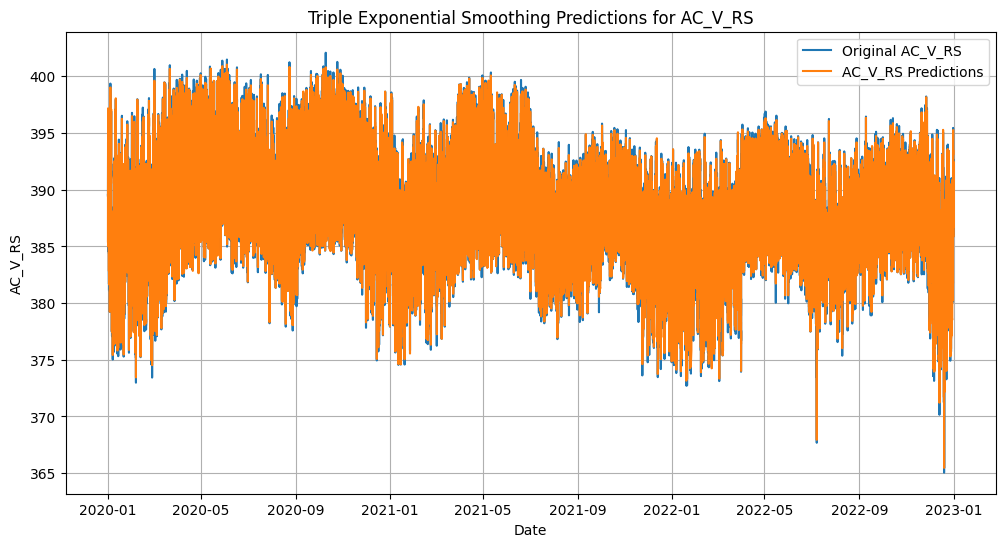

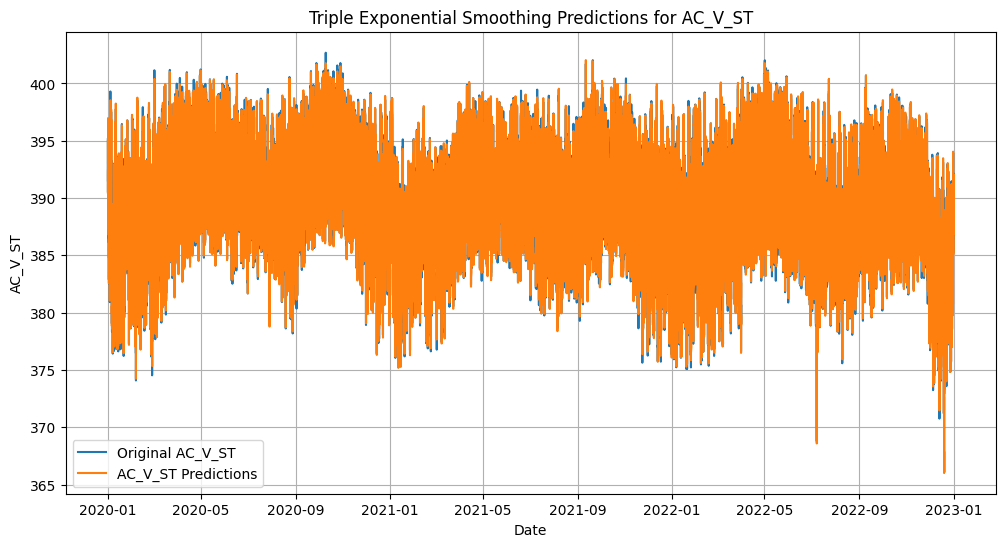

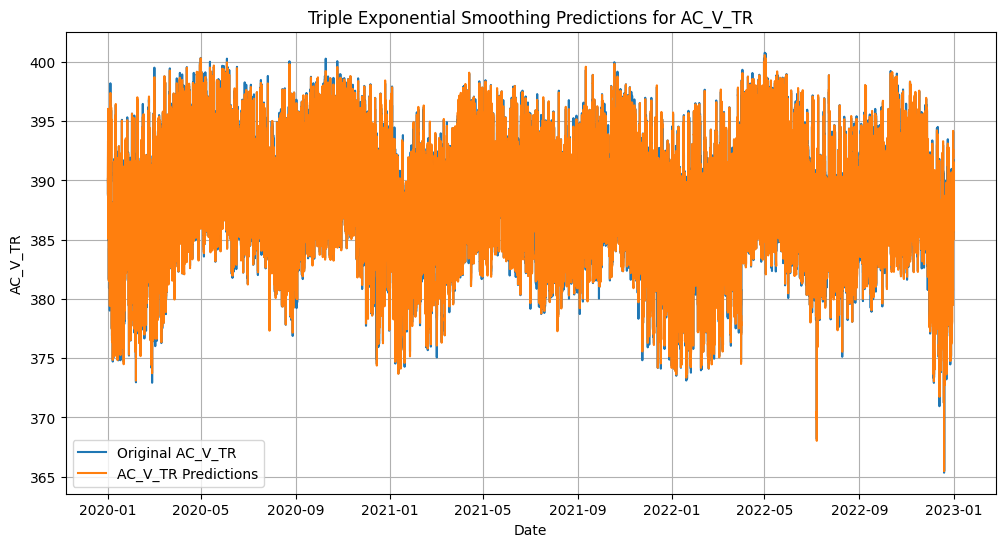

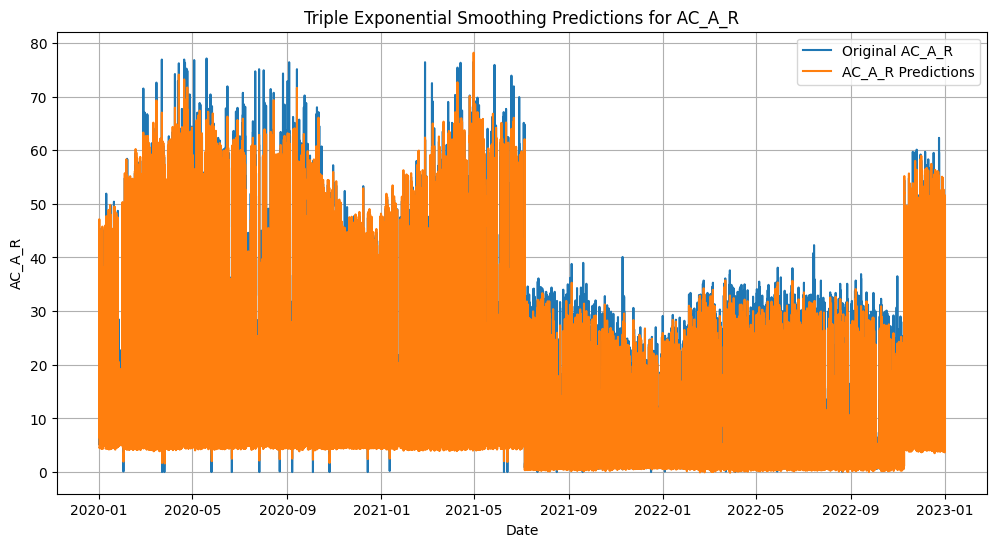

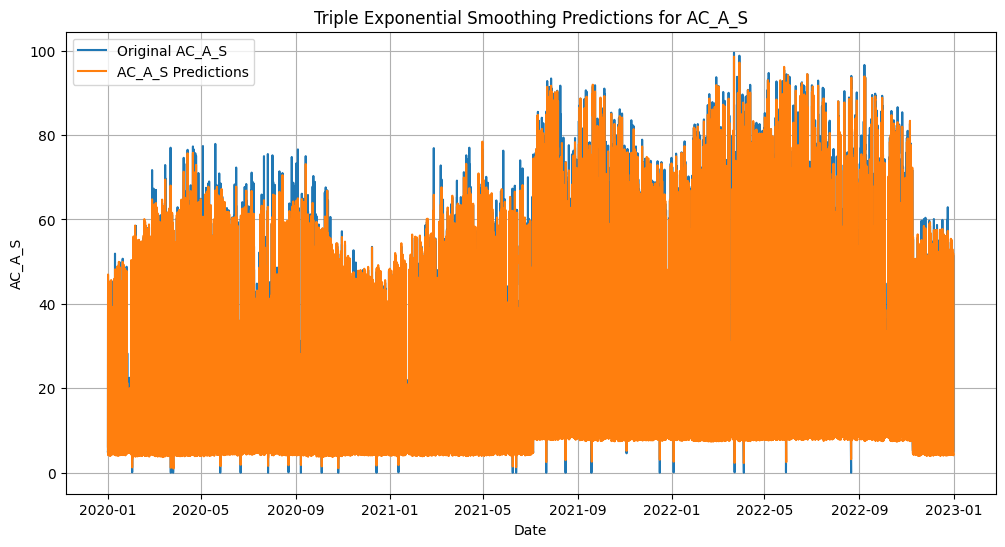

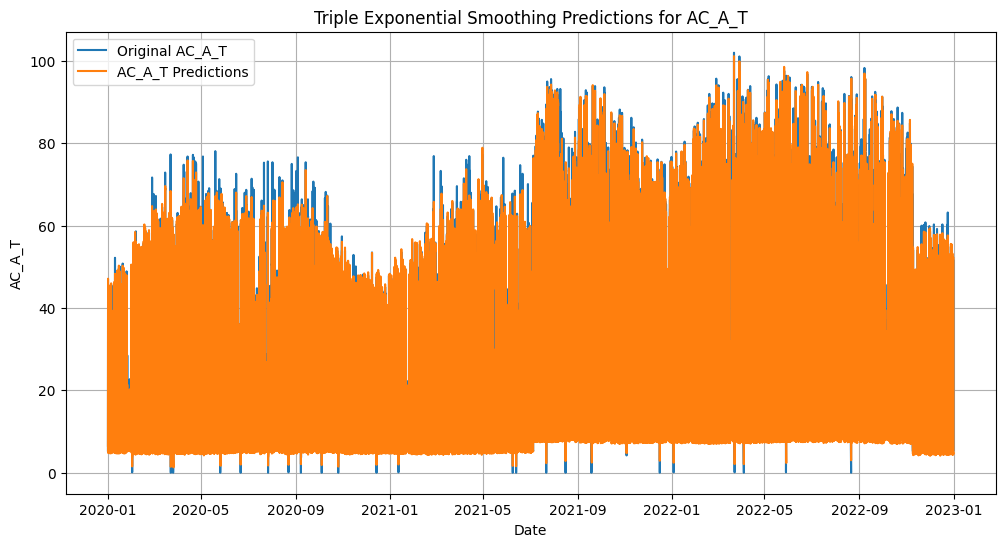

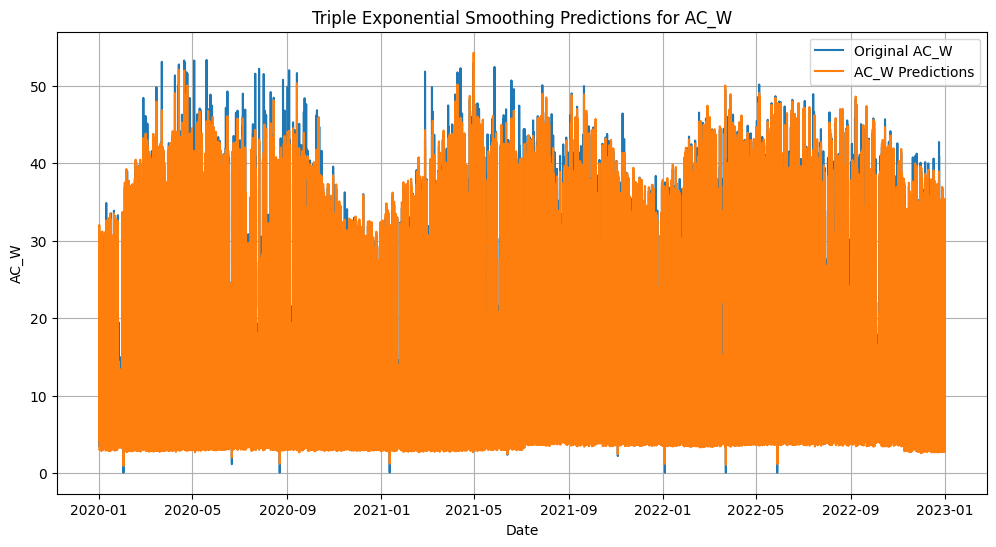

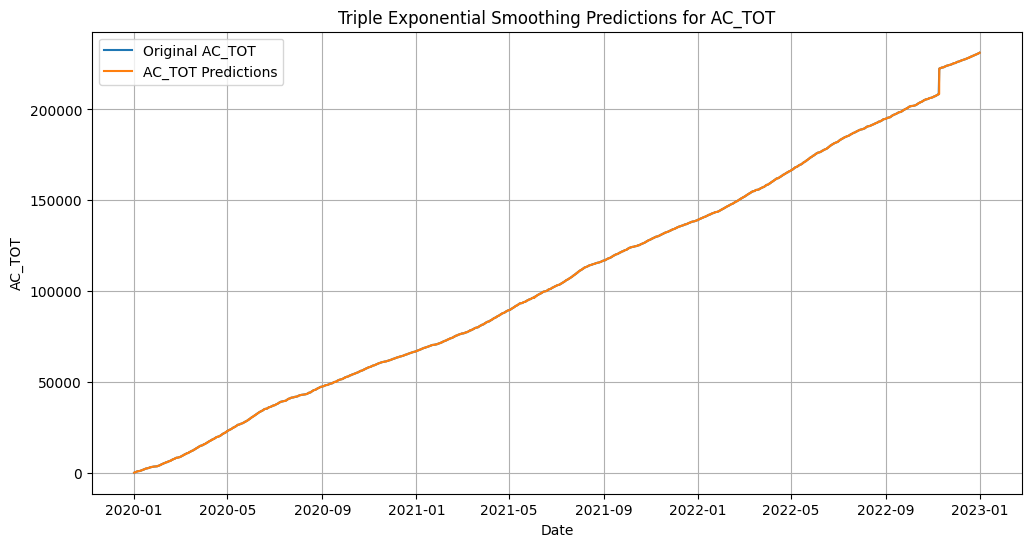

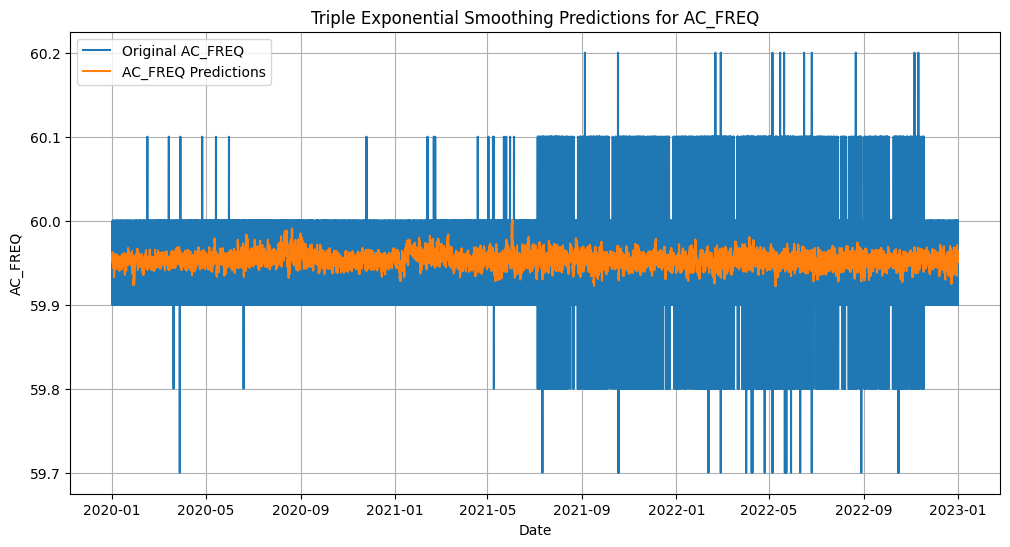

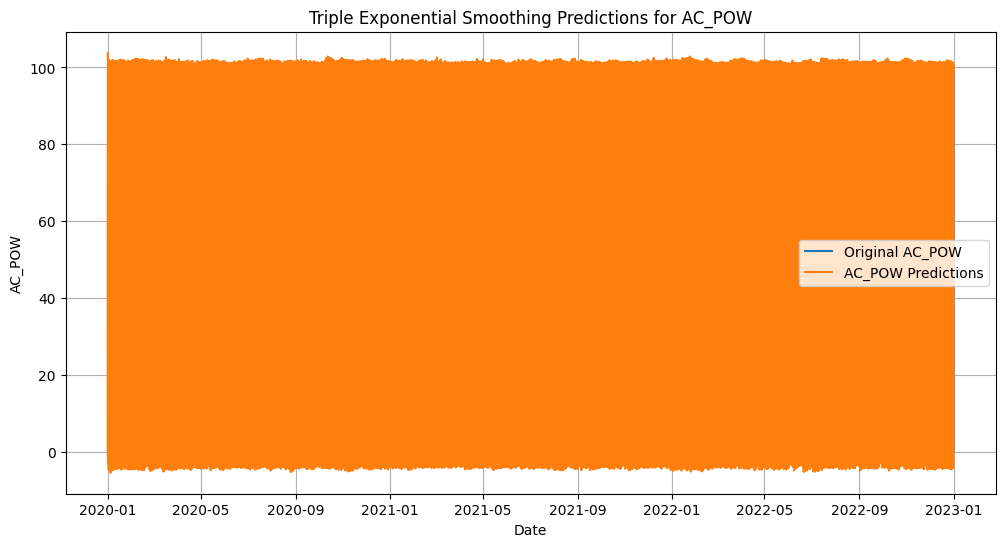

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv', parse_dates=['date'])

# Prepare the data
data.set_index('date', inplace=True)

# Define the columns of interest
columns_of_interest = ['AC_V_RS', 'AC_V_ST', 'AC_V_TR', 'AC_A_R', 'AC_A_S', 'AC_A_T', 'AC_W', 'AC_TOT', 'AC_FREQ', 'AC_POW']

# Implement triple exponential smoothing (Holt-Winters method) for each column
predictions = {}

for column in columns_of_interest:
    model = ExponentialSmoothing(data[column], trend='add', seasonal='add', seasonal_periods=12)
    result = model.fit()
    predictions[column] = result.predict(start=data.index[0], end=data.index[-1])

# Plot the predictions for each column separately
for column in columns_of_interest:
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[column], label=f'Original {column}')
    plt.plot(predictions[column].index, predictions[column], label=f'{column} Predictions')

    plt.title(f'Triple Exponential Smoothing Predictions for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()


**Question 6** Using solar power generation data, pv_2years_eng, implement autoregressive (AR) and display the autoregressive (AR) results in plot().

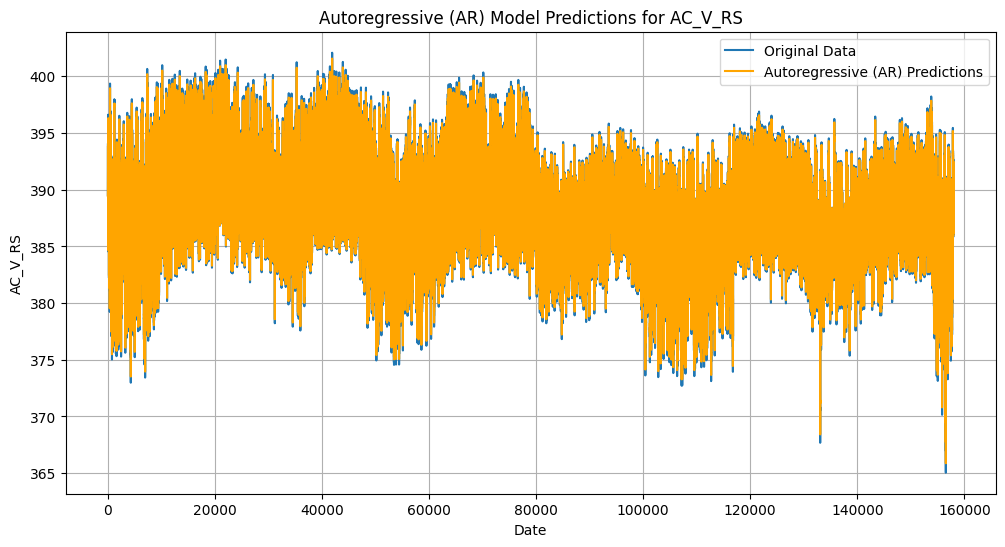

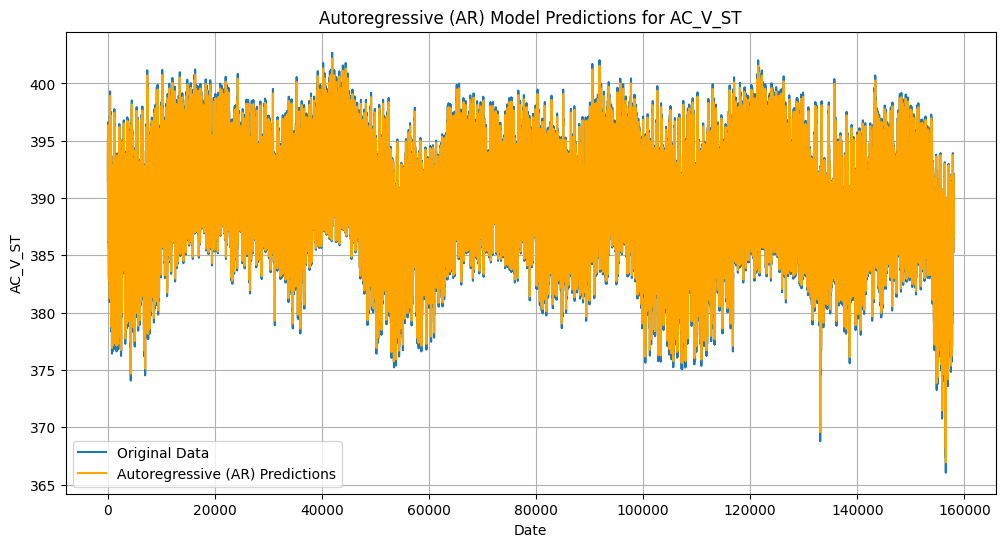

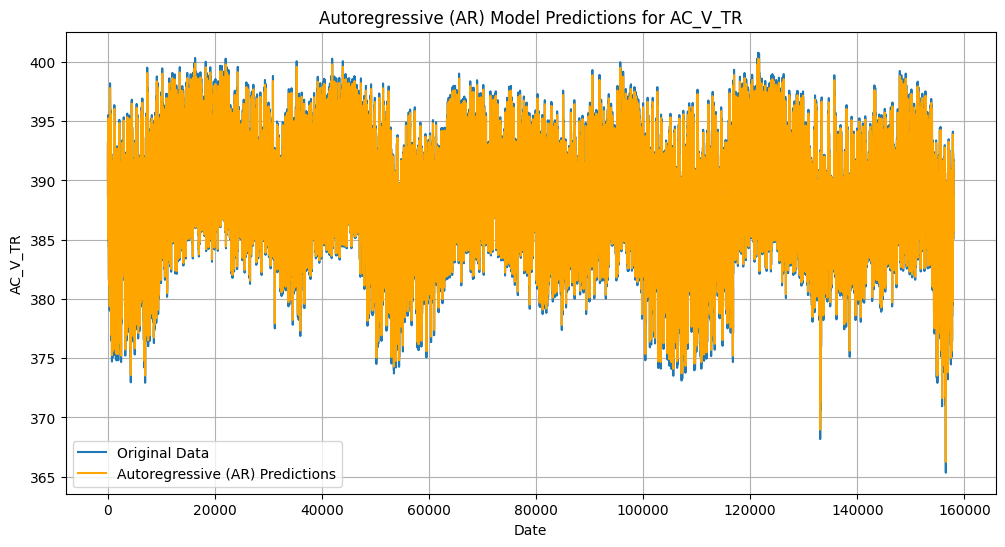

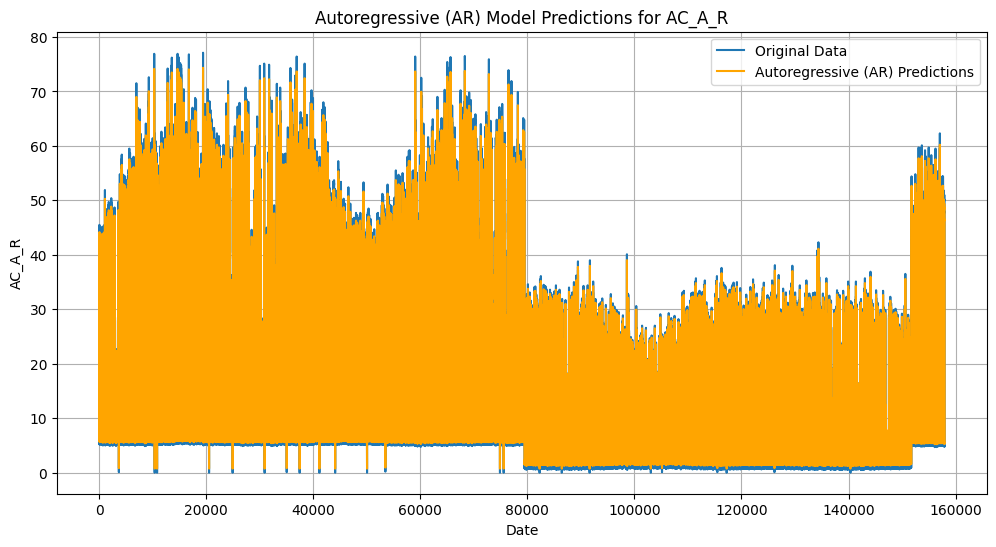

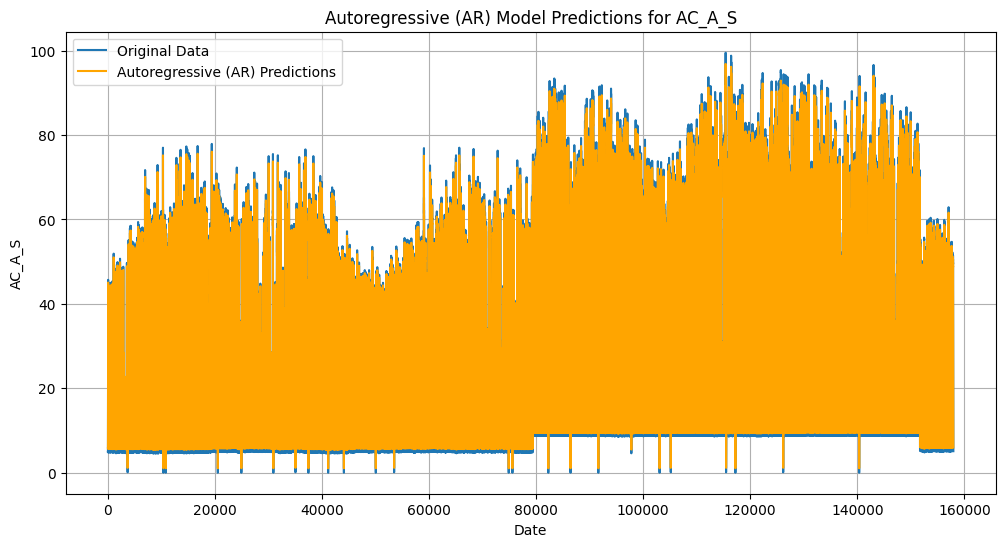

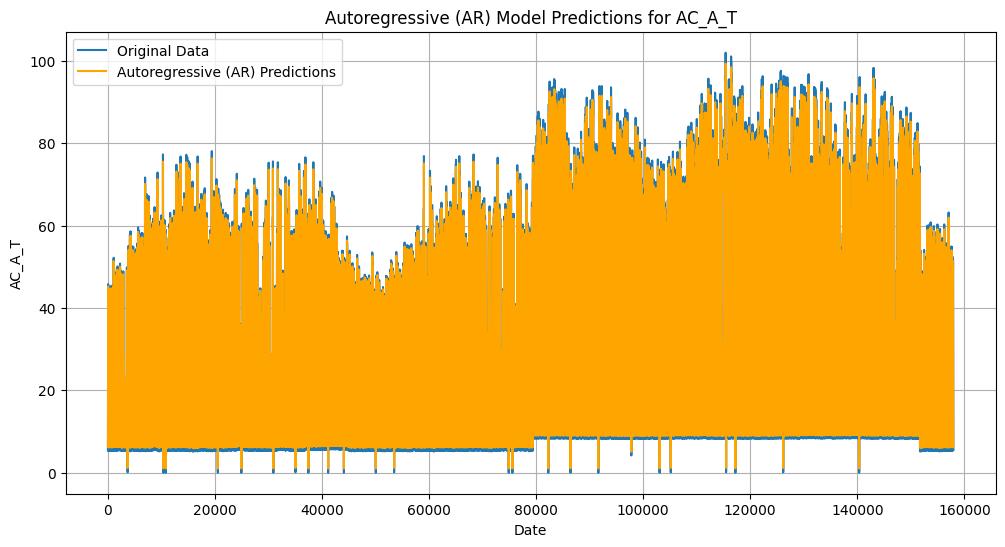

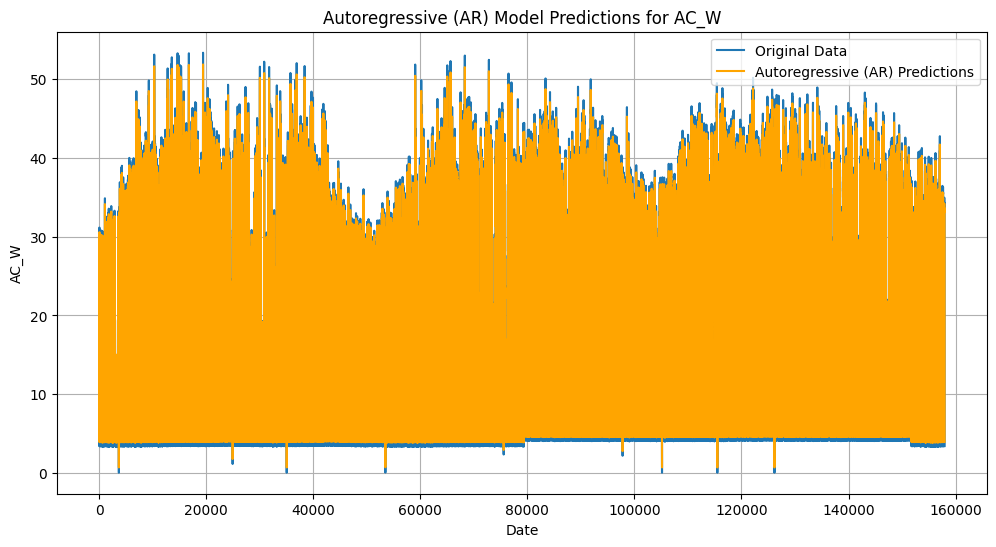

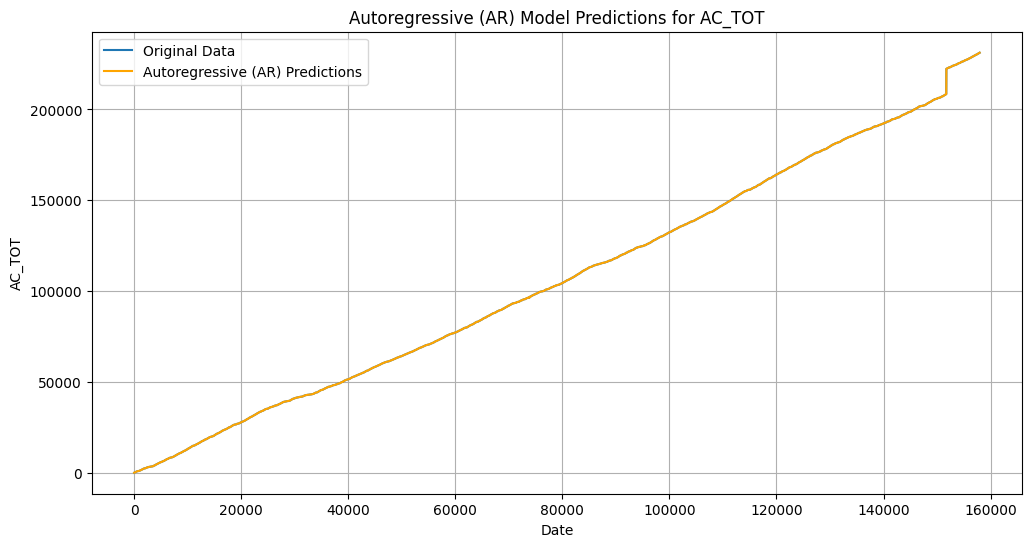

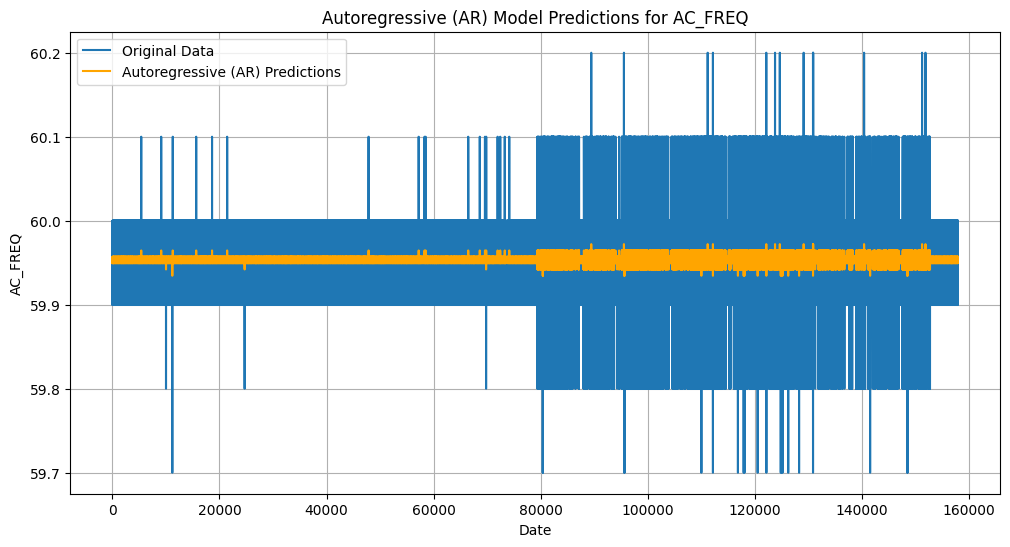

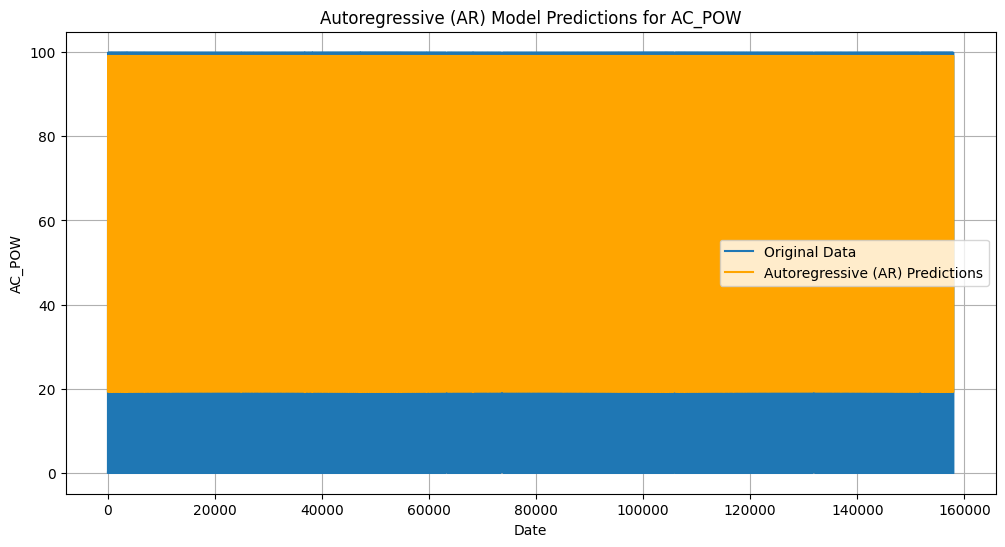

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv')

# Define the columns of interest
columns_of_interest = ['AC_V_RS', 'AC_V_ST', 'AC_V_TR', 'AC_A_R', 'AC_A_S', 'AC_A_T', 'AC_W', 'AC_TOT', 'AC_FREQ', 'AC_POW']

# Plot autoregressive (AR) results for each column
for column in columns_of_interest:
    # Fit autoregressive (AR) model
    model = AutoReg(data[column].dropna(), lags=1)  # Using lag 1 for simplicity
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.predict(start=1, end=len(data[column]))

    # Plot original data and autoregressive (AR) predictions
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[column], label='Original Data')
    plt.plot(data.index, predictions, label='Autoregressive (AR) Predictions', color='orange')

    plt.title(f'Autoregressive (AR) Model Predictions for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()


# SOL Group
* 'SOL_RAD_SLOPE': 'Solar radiation (W/㎡) slope'
* 'SOL_RAD_LEVEL': 'Solar radiation (W/㎡) horizontal',

**Question 1**
Using solar power generation data, pv_2years_eng, decompose the time series into trend, seasonal, and residual components and display them with plot(). At this time, decompose using the additive vs. multiplicative model and present the results.

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv')

# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Set the date column as the index
data.set_index('date', inplace=True)

# Define the columns of interest
columns_of_interest = ['SOL_RAD_SLOPE', 'SOL_RAD_LEVEL']

# Specify frequency
freq = 'H'

# Decompose the time series using both additive and multiplicative models
for column in columns_of_interest:
    # Additive decomposition
    decomposition_add = seasonal_decompose(data[column], model='additive', period=24, extrapolate_trend='freq')

    # Add a small positive constant to avoid zero values
    data[column] = data[column] + 1e-8

    # Multiplicative decomposition
    decomposition_mul = seasonal_decompose(data[column], model='multiplicative', period=24, extrapolate_trend='freq')

    # Plot the decomposed components
    plt.figure(figsize=(18, 14))

    # Additive model plots
    plt.subplot(3, 2, 1)
    plt.plot(decomposition_add.trend, label='Additive Trend')
    plt.title('Additive Trend')
    plt.legend()

    plt.subplot(3, 2, 2)
    plt.plot(decomposition_add.seasonal, label='Additive Seasonal')
    plt.title('Additive Seasonal')
    plt.legend()

    plt.subplot(3, 2, 3)
    plt.plot(decomposition_add.resid, label='Additive Residual')
    plt.title('Additive Residual')
    plt.legend()

    # Multiplicative model plots
    plt.subplot(3, 2, 4)
    plt.plot(decomposition_mul.trend, label='Multiplicative Trend')
    plt.title('Multiplicative Trend')
    plt.legend()

    plt.subplot(3, 2, 5)
    plt.plot(decomposition_mul.seasonal, label='Multiplicative Seasonal')
    plt.title('Multiplicative Seasonal')
    plt.legend()

    plt.subplot(3, 2, 6)
    plt.plot(decomposition_mul.resid, label='Multiplicative Residual')
    plt.title('Multiplicative Residual')
    plt.legend()


    plt.suptitle(f'Decomposition of {data[column].name}', fontsize=14)
    plt.show()

**Question 2**
Using solar power generation data, pv_2years_eng, to ensure stationarity of the time series, calculate the first-order difference and calculate the autocorrelation lag (lag) using the Statsmodels acf() function and plot_acf(). Find .

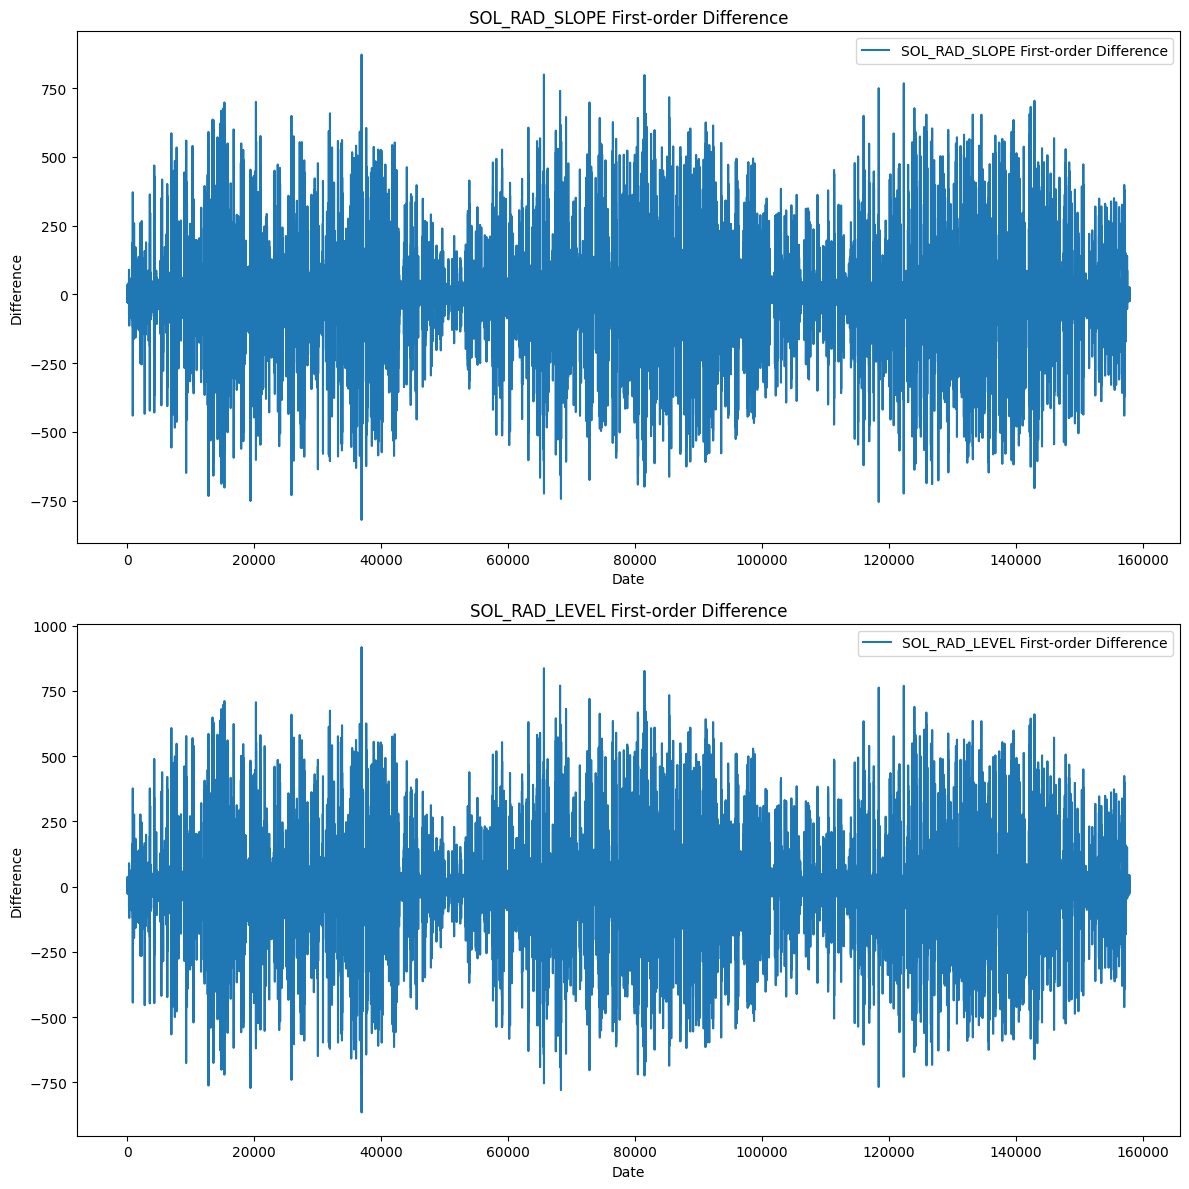

Autocorrelation for SOL_RAD_SLOPE: [ 1.         -0.32410408 -0.0273172  -0.01081699 -0.00346606  0.00959927
 -0.00627839  0.00528909  0.00473701  0.01933861  0.00127121  0.01975889
 -0.00340723  0.00672159  0.00795208  0.00845189  0.01121208 -0.00416961
  0.01111798  0.00375161  0.01661178]
Autocorrelation for SOL_RAD_LEVEL: [ 1.00000000e+00 -3.24401139e-01 -2.74170868e-02 -9.51740092e-03
 -3.19754619e-03  9.82276759e-03 -5.47396248e-03  6.52081502e-03
  3.05355173e-03  2.21958494e-02 -1.99857811e-04  2.09533801e-02
 -4.11203737e-03  7.26040841e-03  8.90762469e-03  8.02991388e-03
  1.19792438e-02 -4.72566038e-03  1.19035243e-02  3.56883843e-03
  1.66421903e-02]


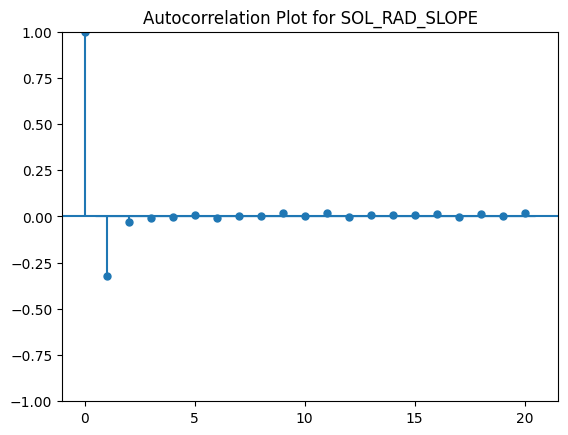

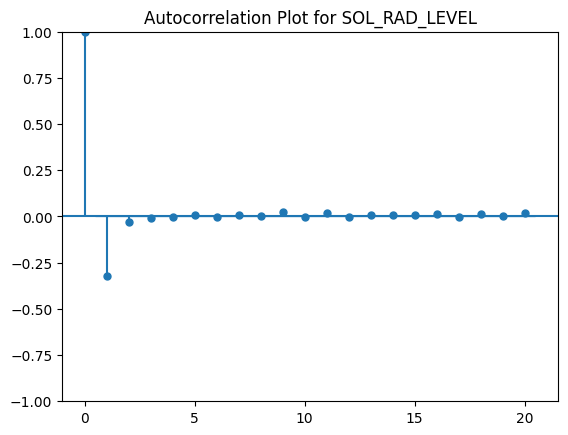

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv')

# Define the columns of interest
columns_of_interest = ['SOL_RAD_SLOPE', 'SOL_RAD_LEVEL']

# Ensure stationarity of the time series by calculating first-order difference
for column in columns_of_interest:
    data[column + '_diff'] = data[column].diff()

# Plot the first-order difference
plt.figure(figsize=(12, 6*len(columns_of_interest)))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(len(columns_of_interest), 1, i)
    plt.plot(data.index, data[column + '_diff'], label=f'{column} First-order Difference')
    plt.title(f'{column} First-order Difference')
    plt.xlabel('Date')
    plt.ylabel('Difference')
    plt.legend()
plt.tight_layout()
plt.show()

# Calculate autocorrelation lag using acf() function
for column in columns_of_interest:
    acf_result = acf(data[column + '_diff'].dropna(), nlags=20)
    print(f'Autocorrelation for {column}: {acf_result}')

# Plot autocorrelation using plot_acf() function
for column in columns_of_interest:
    plot_acf(data[column + '_diff'].dropna(), lags=20, title=f'Autocorrelation Plot for {column}')
    plt.show()


**Question 3** Using solar power generation data, pv_2years_eng, to ensure stationarity of the time series, calculate the first-order difference and calculate the partial autocorrelation lag (lag) using the Statsmodels pacf() function and plot_acf(). ).

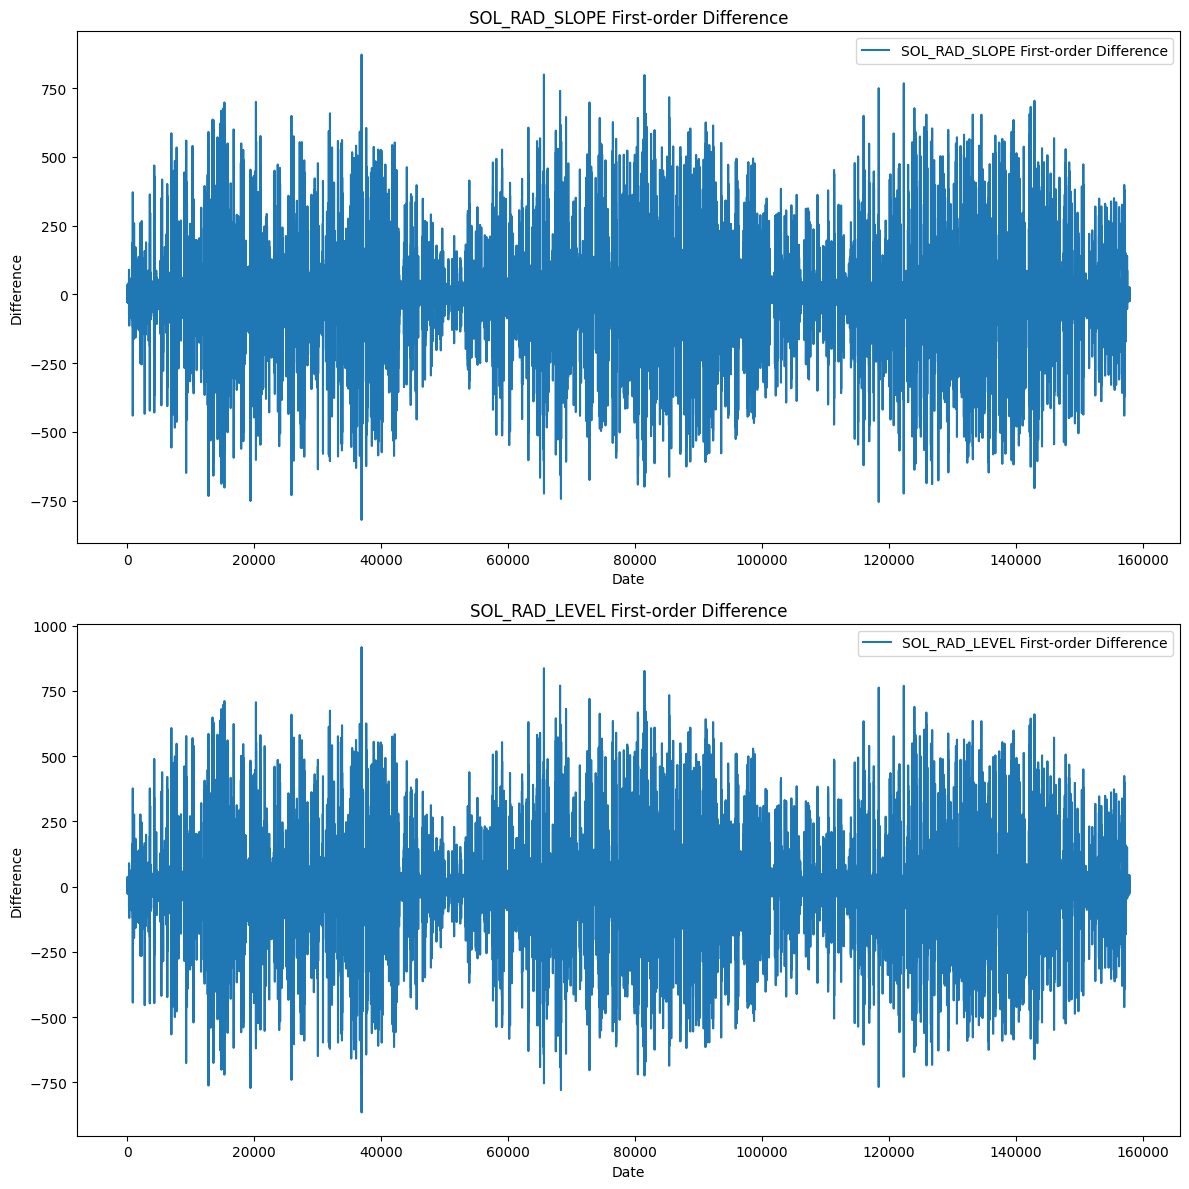

Partial Autocorrelation for SOL_RAD_SLOPE: [ 1.00000000e+00 -3.24106129e-01 -1.47898275e-01 -7.87260973e-02
 -4.36488543e-02 -1.20898121e-02 -1.09401382e-02 -2.68585845e-04
  6.70970014e-03  2.77667505e-02  2.25266152e-02  3.82214663e-02
  2.37775828e-02  2.28453431e-02  2.42560108e-02  2.62431813e-02
  3.01809421e-02  1.57057327e-02  2.08564329e-02  1.76189668e-02
  2.90839389e-02]
Partial Autocorrelation for SOL_RAD_LEVEL: [ 1.         -0.32440319 -0.14825706 -0.0775065  -0.04236651 -0.01092672
 -0.00920674  0.00238787  0.00665     0.03078017  0.02312078  0.03972952
  0.02394224  0.02336998  0.02548463  0.02656006  0.03097948  0.01552838
  0.02123374  0.01760565  0.02879416]


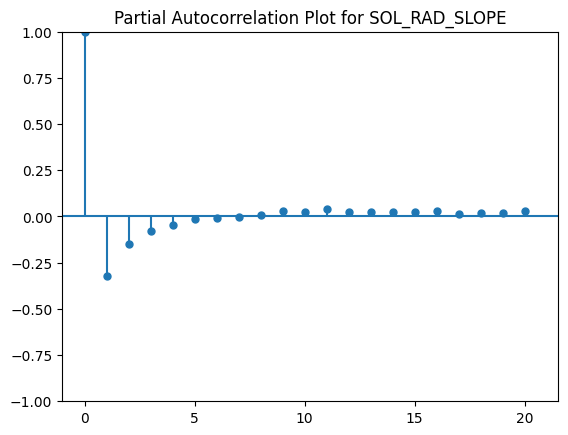

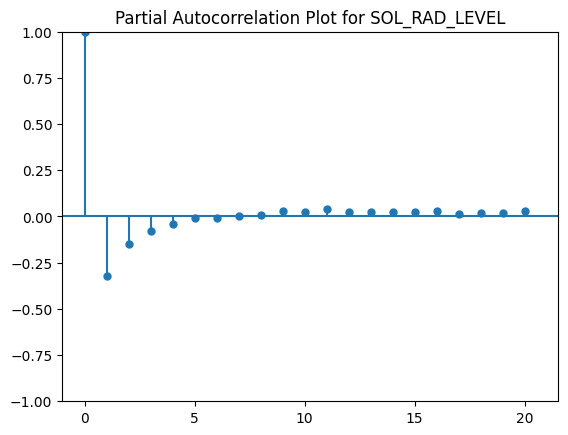

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv')

# Define the columns of interest
columns_of_interest = ['SOL_RAD_SLOPE', 'SOL_RAD_LEVEL']

# Ensure stationarity of the time series by calculating first-order difference
for column in columns_of_interest:
    data[column + '_diff'] = data[column].diff()

# Plot the first-order difference
plt.figure(figsize=(12, 6*len(columns_of_interest)))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(len(columns_of_interest), 1, i)
    plt.plot(data.index, data[column + '_diff'], label=f'{column} First-order Difference')
    plt.title(f'{column} First-order Difference')
    plt.xlabel('Date')
    plt.ylabel('Difference')
    plt.legend()
plt.tight_layout()
plt.show()

# Calculate partial autocorrelation lag using pacf() function
for column in columns_of_interest:
    pacf_result = pacf(data[column + '_diff'].dropna(), nlags=20)
    print(f'Partial Autocorrelation for {column}: {pacf_result}')

# Plot partial autocorrelation using plot_pacf() function
for column in columns_of_interest:
    plot_pacf(data[column + '_diff'].dropna(), lags=20, title=f'Partial Autocorrelation Plot for {column}')
    plt.show()


**Question 4** Using solar power generation data, pv_2years_eng, implement it as a moving average (MA), and display the moving average prediction results as plot().

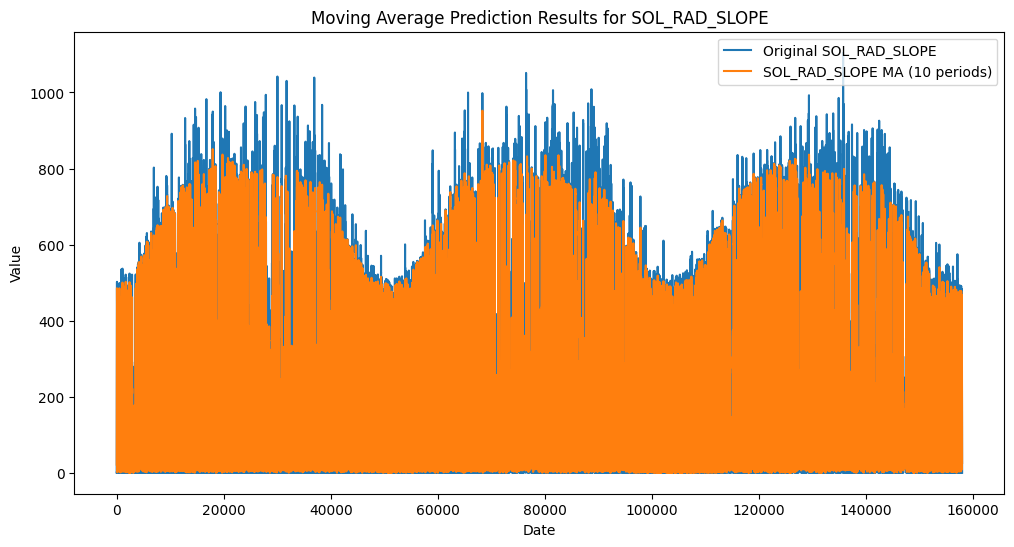

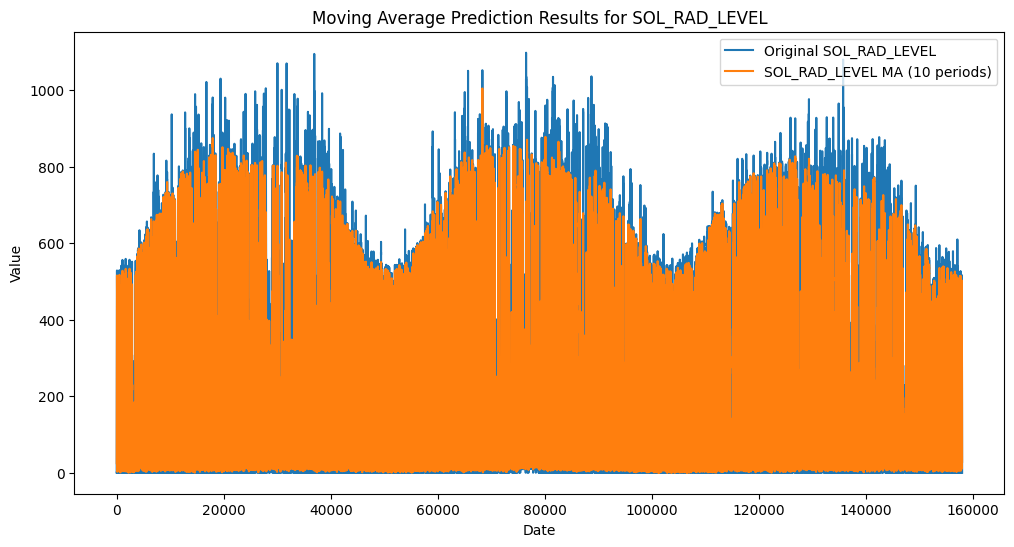

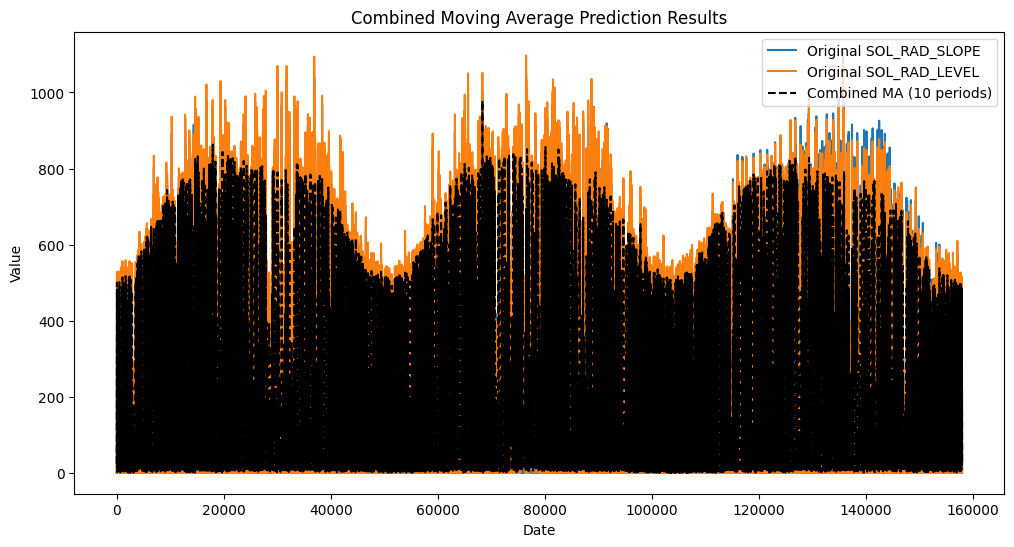

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv')

# Define the columns of interest
columns_of_interest = ['SOL_RAD_SLOPE', 'SOL_RAD_LEVEL']

# Plot original data and moving average for each column separately
for column in columns_of_interest:
    plt.figure(figsize=(12, 6))

    # Plot original data
    plt.plot(data.index, data[column], label=f'Original {column}')

    # Implement moving average (MA)
    window_size = 10  # Specify the window size for the moving average
    ma = data[column].rolling(window=window_size).mean()
    plt.plot(data.index, ma, label=f'{column} MA ({window_size} periods)')

    plt.title(f'Moving Average Prediction Results for {column}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Calculate combined moving average
window_size = 10  # Specify the window size for the moving average
combined_ma = data[columns_of_interest].rolling(window=window_size).mean().mean(axis=1)

# Plot combined moving average
plt.figure(figsize=(12, 6))

# Plot original data for each column
for column in columns_of_interest:
    plt.plot(data.index, data[column], label=f'Original {column}')

# Plot combined moving average
plt.plot(data.index, combined_ma, label=f'Combined MA ({window_size} periods)', color='black', linestyle='--')

plt.title('Combined Moving Average Prediction Results')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

**Question 5** Using solar power generation data, pv_2years_eng, implement triple exponential smoothing and display the triple exponential smoothing results with plot().

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/opt/conda/lib/python3.10/site-

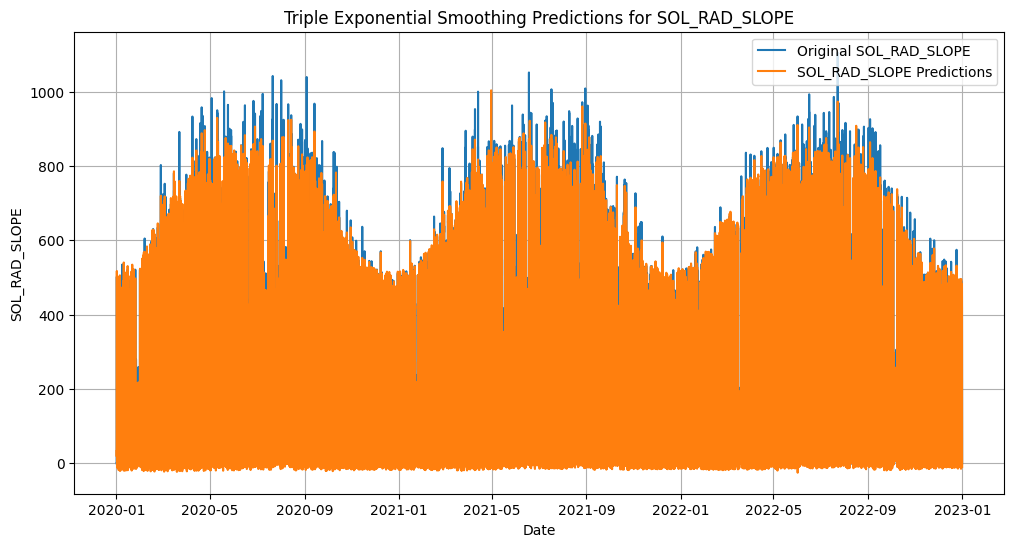

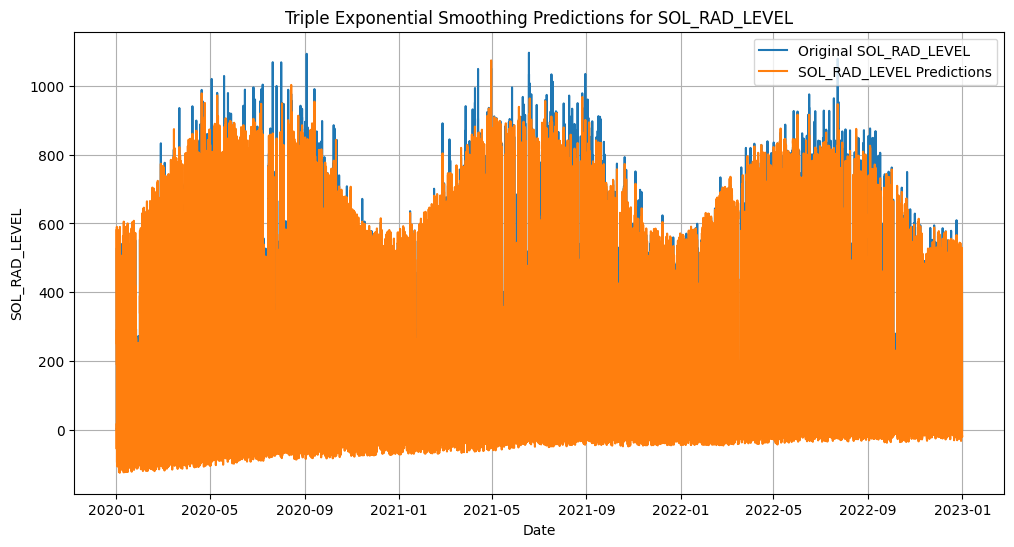

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv', parse_dates=['date'])

# Prepare the data
data.set_index('date', inplace=True)

# Define the columns of interest
columns_of_interest = ['SOL_RAD_SLOPE', 'SOL_RAD_LEVEL']

# Implement triple exponential smoothing (Holt-Winters method) for each column
predictions = {}

for column in columns_of_interest:
    model = ExponentialSmoothing(data[column], trend='add', seasonal='add', seasonal_periods=12)
    result = model.fit()
    predictions[column] = result.predict(start=data.index[0], end=data.index[-1])

# Plot the predictions for each column separately
for column in columns_of_interest:
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[column], label=f'Original {column}')
    plt.plot(predictions[column].index, predictions[column], label=f'{column} Predictions')

    plt.title(f'Triple Exponential Smoothing Predictions for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()


**Question 6** Using solar power generation data, pv_2years_eng, implement autoregressive (AR) and display the autoregressive (AR) results in plot().

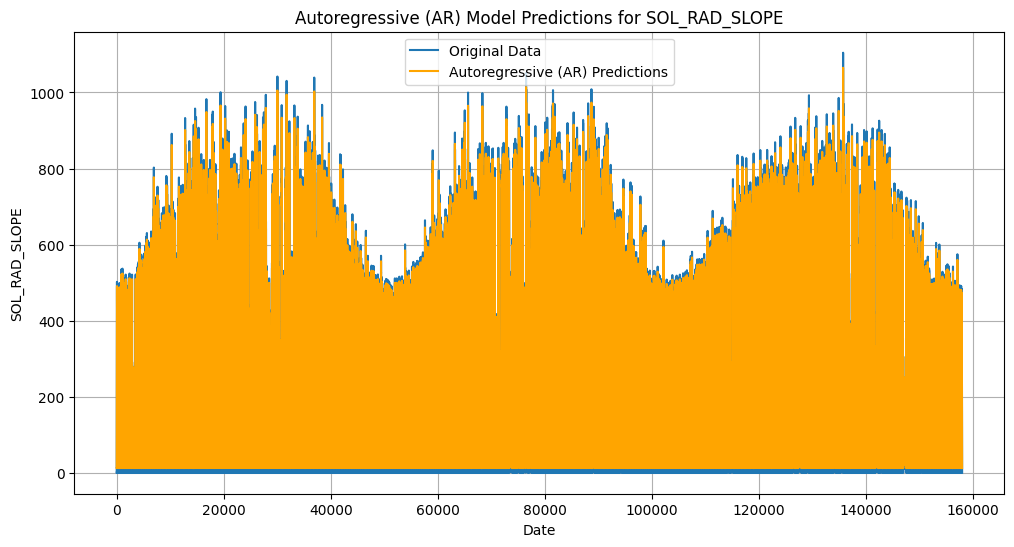

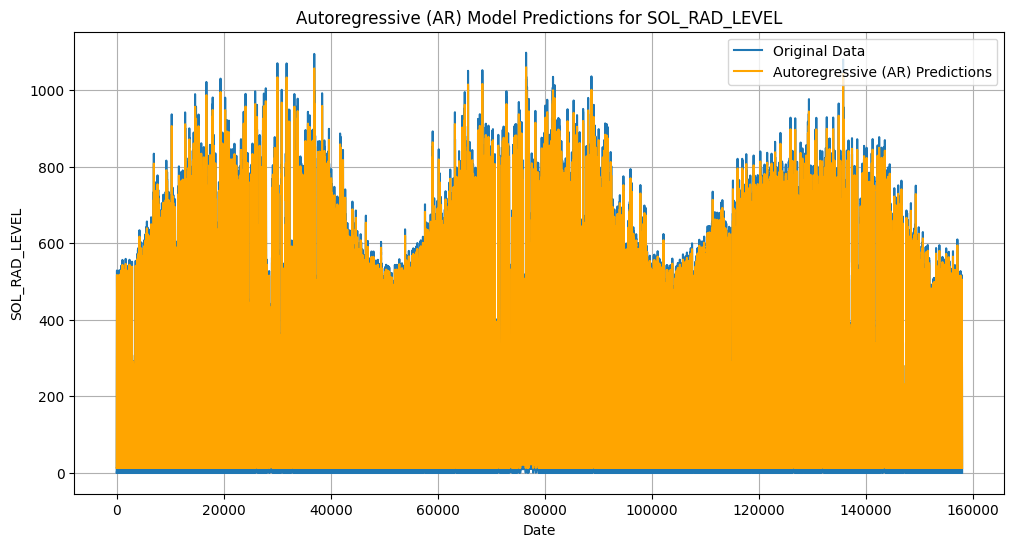

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv')

# Define the columns of interest
columns_of_interest = ['SOL_RAD_SLOPE', 'SOL_RAD_LEVEL']

# Plot autoregressive (AR) results for each column
for column in columns_of_interest:
    # Fit autoregressive (AR) model
    model = AutoReg(data[column].dropna(), lags=1)  # Using lag 1 for simplicity
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.predict(start=1, end=len(data[column]))

    # Plot original data and autoregressive (AR) predictions
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[column], label='Original Data')
    plt.plot(data.index, predictions, label='Autoregressive (AR) Predictions', color='orange')

    plt.title(f'Autoregressive (AR) Model Predictions for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()


# TMP Group
* 'TMP_MODU': 'Module (℃) temperature'
* 'TMP_CLI': 'Outdoor (℃) temperature'}

**Question 1**
Using solar power generation data, pv_2years_eng, decompose the time series into trend, seasonal, and residual components and display them with plot(). At this time, decompose using the additive vs. multiplicative model and present the results.

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv')

# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Set the date column as the index
data.set_index('date', inplace=True)

# Define the columns of interest
columns_of_interest = ['TMP_MODU', 'TMP_CLI']

# Decompose the time series using both additive and multiplicative models
for column in columns_of_interest:
    # Additive decomposition
    decomposition_add = seasonal_decompose(data[column], model='additive', period=24, extrapolate_trend='freq')

    # Multiplicative decomposition with handling zero or negative values
    data_positive = data[column] + abs(data[column].min()) + 1e-8
    decomposition_mul = seasonal_decompose(data_positive, model='multiplicative', period=24, extrapolate_trend='freq')

    # Plot the decomposed components
    plt.figure(figsize=(18, 14))

    # Additive model plots
    plt.subplot(3, 2, 1)
    plt.plot(decomposition_add.trend, label='Additive Trend')
    plt.title('Additive Trend')
    plt.legend()

    plt.subplot(3, 2, 2)
    plt.plot(decomposition_add.seasonal, label='Additive Seasonal')
    plt.title('Additive Seasonal')
    plt.legend()

    plt.subplot(3, 2, 3)
    plt.plot(decomposition_add.resid, label='Additive Residual')
    plt.title('Additive Residual')
    plt.legend()

    # Multiplicative model plots
    plt.subplot(3, 2, 4)
    plt.plot(decomposition_mul.trend, label='Multiplicative Trend')
    plt.title('Multiplicative Trend')
    plt.legend()

    plt.subplot(3, 2, 5)
    plt.plot(decomposition_mul.seasonal, label='Multiplicative Seasonal')
    plt.title('Multiplicative Seasonal')
    plt.legend()

    plt.subplot(3, 2, 6)
    plt.plot(decomposition_mul.resid, label='Multiplicative Residual')
    plt.title('Multiplicative Residual')
    plt.legend()


    plt.suptitle(f'Decomposition of {column}', fontsize=16)
    plt.show()

**Question 2**
Using solar power generation data, pv_2years_eng, to ensure stationarity of the time series, calculate the first-order difference and calculate the autocorrelation lag (lag) using the Statsmodels acf() function and plot_acf(). Find .

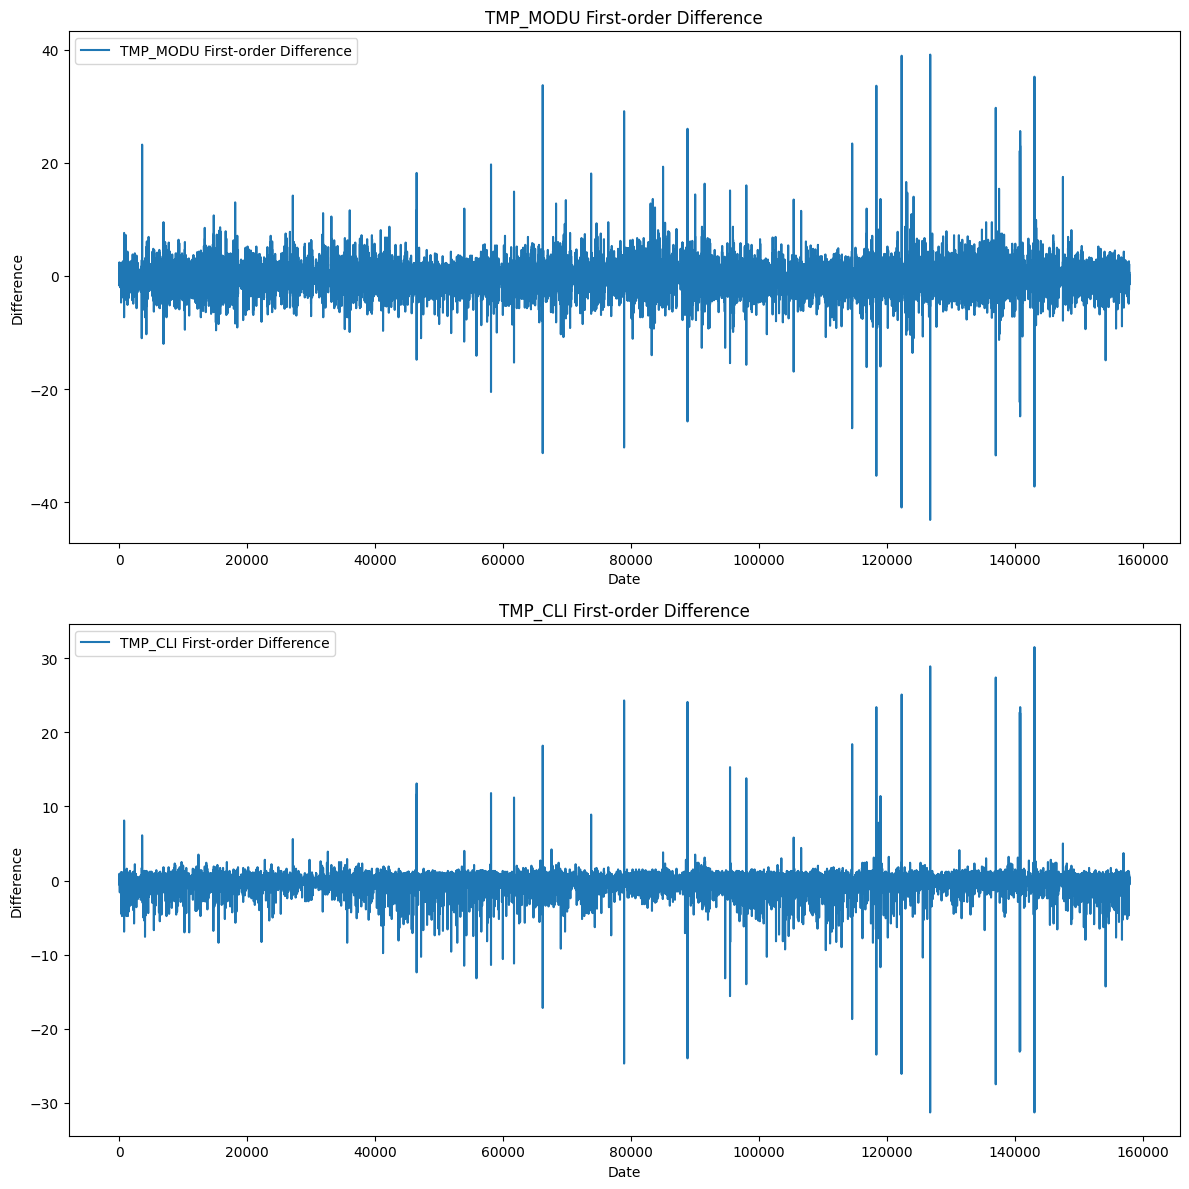

Autocorrelation for TMP_MODU: [1.00000000e+00 1.78915087e-01 2.19442581e-02 6.57515433e-04
 7.30922800e-03 1.63847738e-02 2.34079244e-02 2.61482745e-02
 3.10868827e-02 4.15858066e-02 4.28749159e-02 3.36940211e-02
 3.15663211e-02 2.76794541e-02 4.07340709e-02 2.53555257e-02
 2.58612141e-02 1.35431768e-02 2.37889534e-02 2.26492953e-02
 1.69404605e-02]
Autocorrelation for TMP_CLI: [ 1.         -0.05192217  0.06463649  0.02731257  0.02321965  0.03640293
  0.01592063  0.02359521  0.00483142  0.02389163  0.010404    0.02394473
  0.01600913  0.01188936  0.02673682  0.01255178  0.01838375 -0.00240636
  0.01055333  0.00668685 -0.00522245]


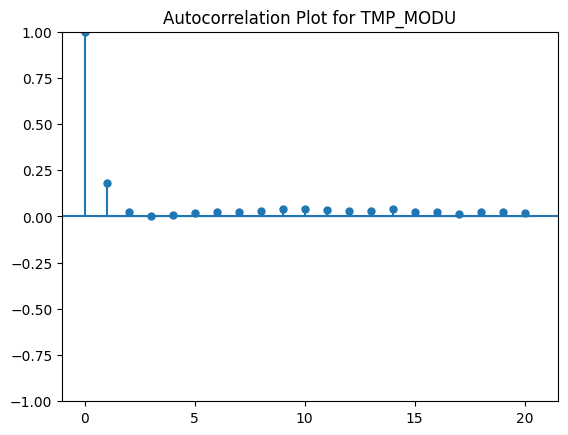

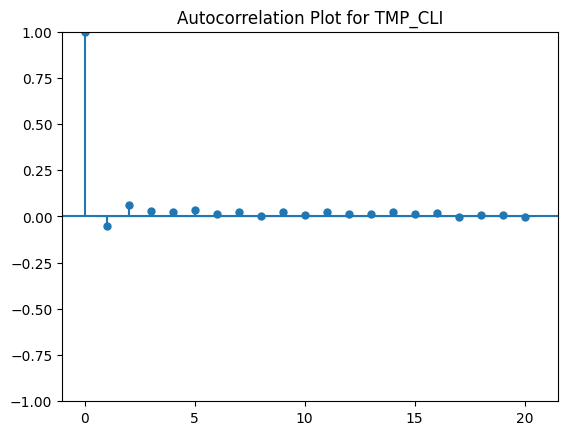

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv')

# Define the columns of interest
columns_of_interest = ['TMP_MODU', 'TMP_CLI']

# Ensure stationarity of the time series by calculating first-order difference
for column in columns_of_interest:
    data[column + '_diff'] = data[column].diff()

# Plot the first-order difference
plt.figure(figsize=(12, 6*len(columns_of_interest)))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(len(columns_of_interest), 1, i)
    plt.plot(data.index, data[column + '_diff'], label=f'{column} First-order Difference')
    plt.title(f'{column} First-order Difference')
    plt.xlabel('Date')
    plt.ylabel('Difference')
    plt.legend()
plt.tight_layout()
plt.show()

# Calculate autocorrelation lag using acf() function
for column in columns_of_interest:
    acf_result = acf(data[column + '_diff'].dropna(), nlags=20)
    print(f'Autocorrelation for {column}: {acf_result}')

# Plot autocorrelation using plot_acf() function
for column in columns_of_interest:
    plot_acf(data[column + '_diff'].dropna(), lags=20, title=f'Autocorrelation Plot for {column}')
    plt.show()


**Question 3** Using solar power generation data, pv_2years_eng, to ensure stationarity of the time series, calculate the first-order difference and calculate the partial autocorrelation lag (lag) using the Statsmodels pacf() function and plot_acf(). ).

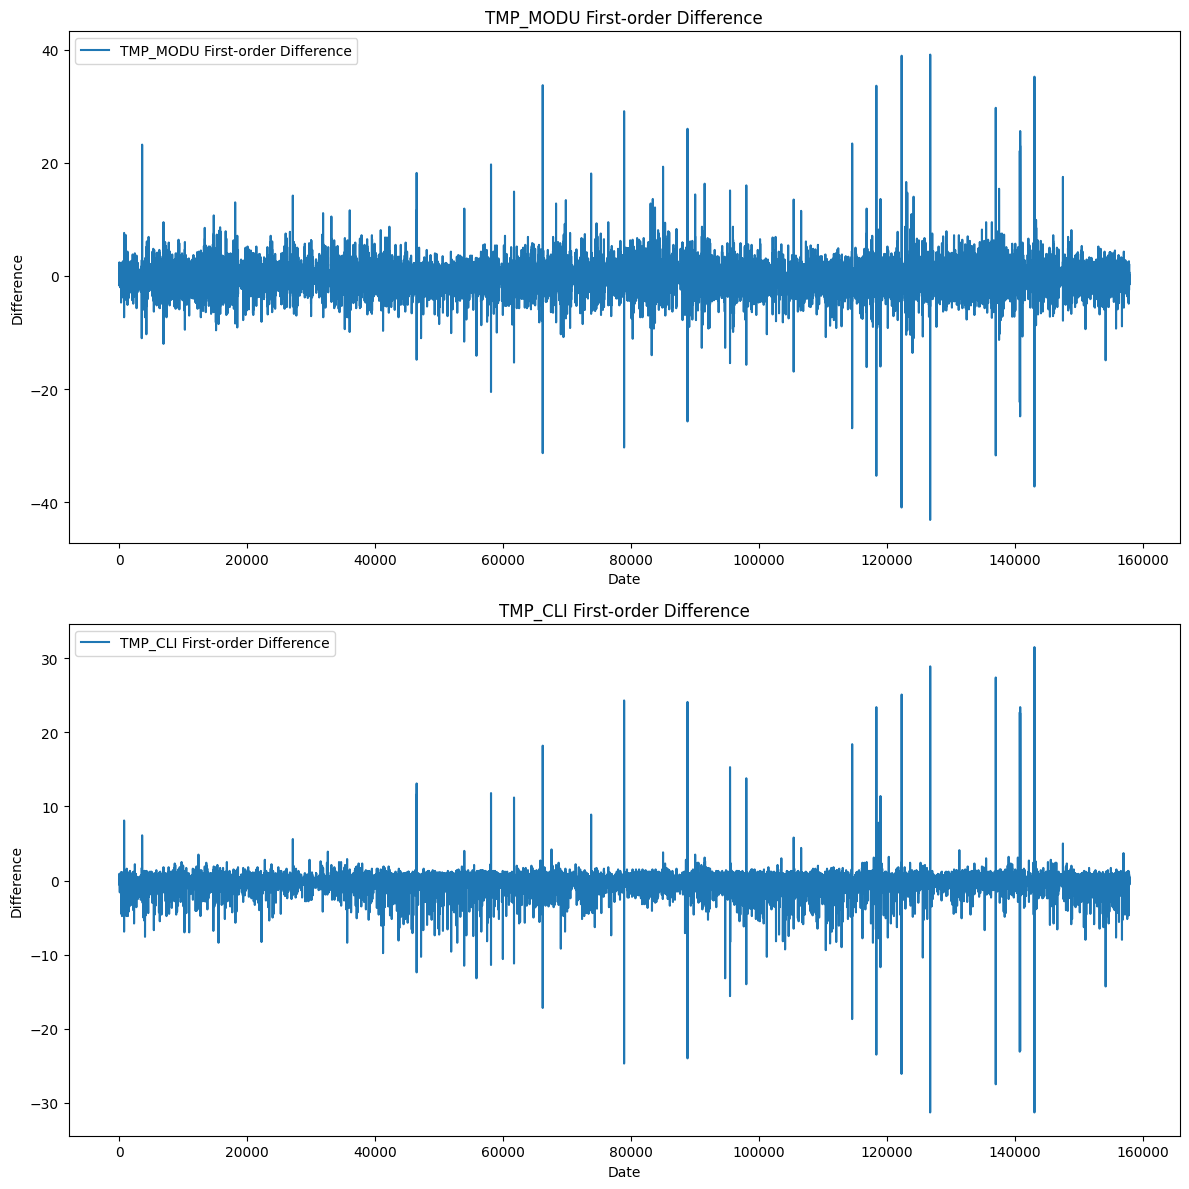

Partial Autocorrelation for TMP_MODU: [ 1.          0.17891622 -0.01039937 -0.001497    0.00793554  0.0141711
  0.01846812  0.01919416  0.02363821  0.03271799  0.03026584  0.02066109
  0.02165009  0.01741603  0.03162861  0.0100686   0.01647859  0.0022082
  0.01667316  0.01051704  0.00526923]
Partial Autocorrelation for TMP_CLI: [ 1.         -0.0519225   0.06210881  0.03390748  0.02241942  0.03508486
  0.01591604  0.01953567  0.00244059  0.01919203  0.00903835  0.02019914
  0.01413698  0.00844357  0.02250636  0.01077065  0.01289874 -0.00624831
  0.00403395  0.00356361 -0.00908558]


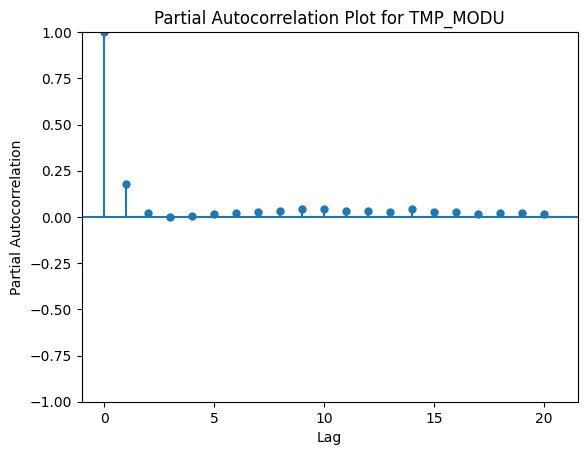

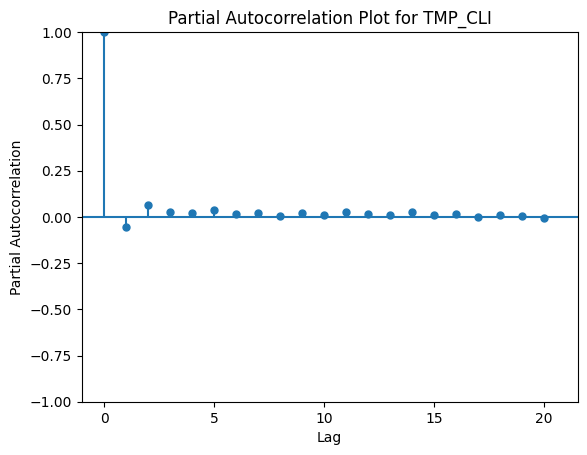

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv')

# Define the columns of interest
columns_of_interest = ['TMP_MODU', 'TMP_CLI']

# Ensure stationarity of the time series by calculating first-order difference
for column in columns_of_interest:
    data[column + '_diff'] = data[column].diff()

# Plot the first-order difference
plt.figure(figsize=(12, 6*len(columns_of_interest)))
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(len(columns_of_interest), 1, i)
    plt.plot(data.index, data[column + '_diff'], label=f'{column} First-order Difference')
    plt.title(f'{column} First-order Difference')
    plt.xlabel('Date')
    plt.ylabel('Difference')
    plt.legend()
plt.tight_layout()
plt.show()

# Calculate partial autocorrelation lag using pacf() function
for column in columns_of_interest:
    pacf_result = pacf(data[column + '_diff'].dropna(), nlags=20)
    print(f'Partial Autocorrelation for {column}: {pacf_result}')

# Plot partial autocorrelation using plot_acf() function
for column in columns_of_interest:
    plot_acf(data[column + '_diff'].dropna(), lags=20, title=f'Partial Autocorrelation Plot for {column}')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.show()


**Question 4** Using solar power generation data, pv_2years_eng, implement it as a moving average (MA), and display the moving average prediction results as plot().

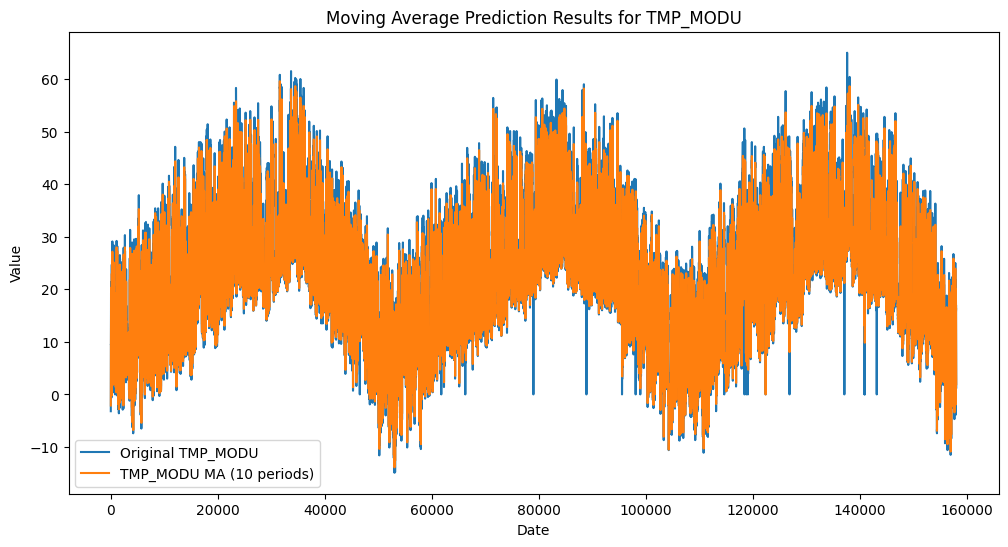

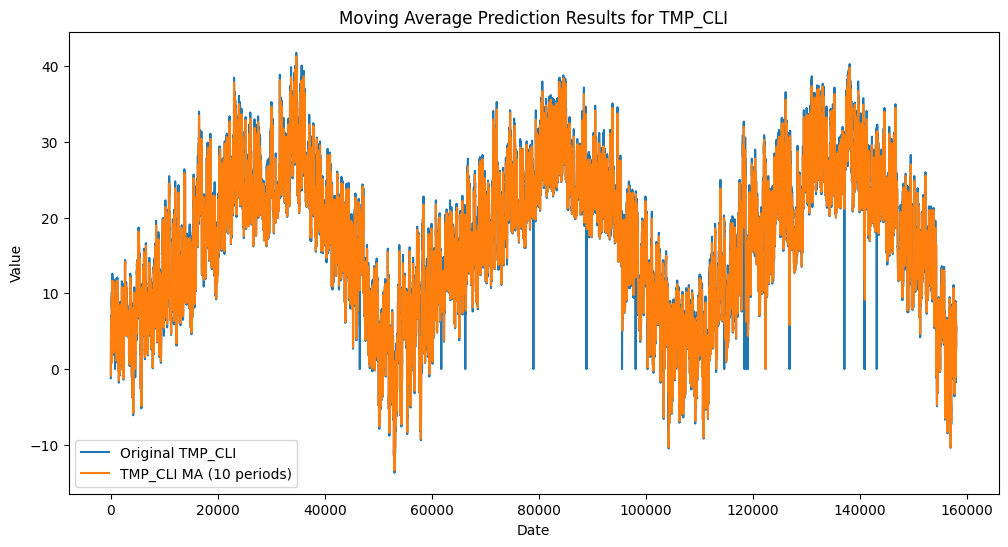

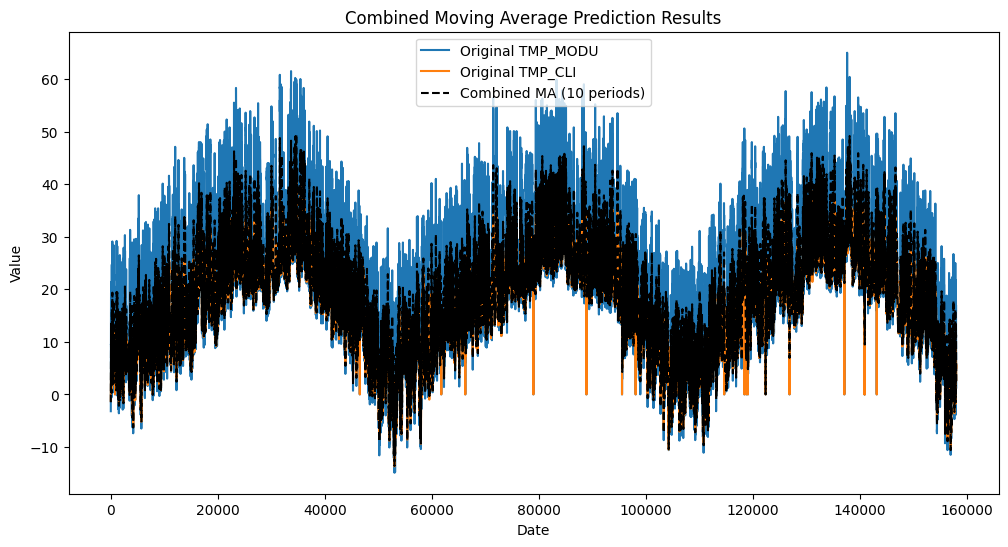

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv')

# Define the columns of interest
columns_of_interest = ['TMP_MODU', 'TMP_CLI']

# Plot original data and moving average for each column separately
for column in columns_of_interest:
    plt.figure(figsize=(12, 6))

    # Plot original data
    plt.plot(data.index, data[column], label=f'Original {column}')

    # Implement moving average (MA)
    window_size = 10  # Specify the window size for the moving average
    ma = data[column].rolling(window=window_size).mean()
    plt.plot(data.index, ma, label=f'{column} MA ({window_size} periods)')

    plt.title(f'Moving Average Prediction Results for {column}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Calculate combined moving average
window_size = 10  # Specify the window size for the moving average
combined_ma = data[columns_of_interest].rolling(window=window_size).mean().mean(axis=1)

# Plot combined moving average
plt.figure(figsize=(12, 6))

# Plot original data for each column
for column in columns_of_interest:
    plt.plot(data.index, data[column], label=f'Original {column}')

# Plot combined moving average
plt.plot(data.index, combined_ma, label=f'Combined MA ({window_size} periods)', color='black', linestyle='--')

plt.title('Combined Moving Average Prediction Results')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


**Question 5** Using solar power generation data, pv_2years_eng, implement triple exponential smoothing and display the triple exponential smoothing results with plot().

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


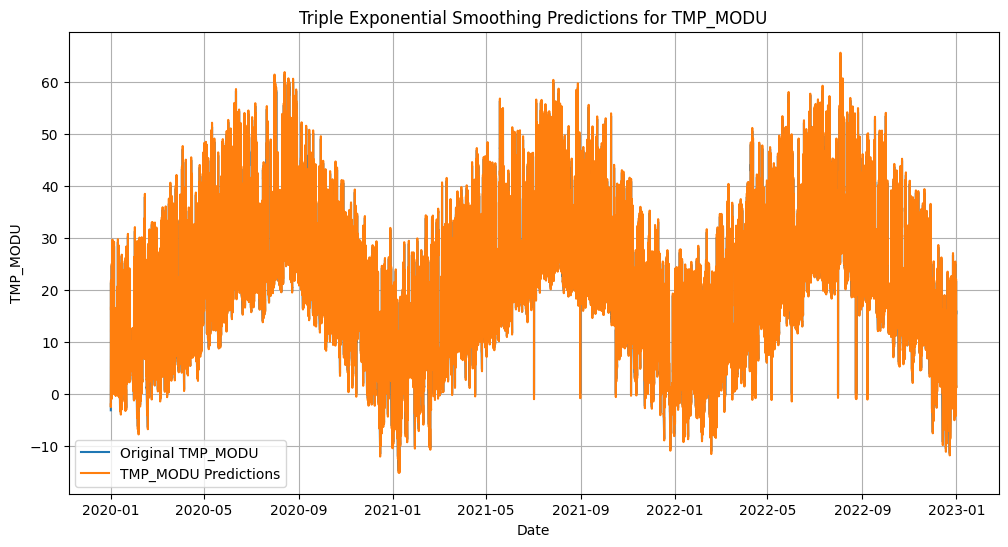

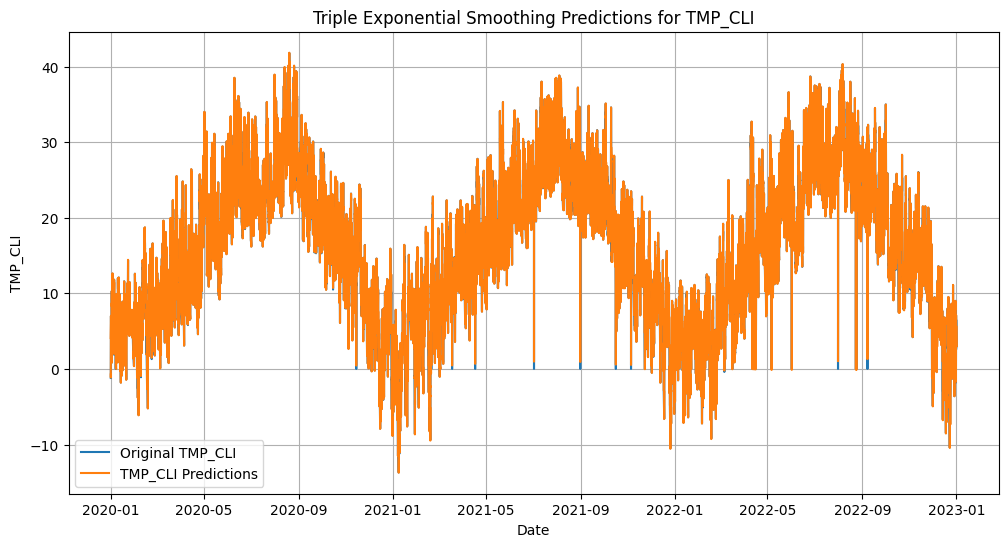

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv', parse_dates=['date'])

# Prepare the data
data.set_index('date', inplace=True)

# Define the columns of interest
columns_of_interest = ['TMP_MODU', 'TMP_CLI']

# Implement triple exponential smoothing (Holt-Winters method) for each column
predictions = {}

for column in columns_of_interest:
    model = ExponentialSmoothing(data[column], trend='add', seasonal='add', seasonal_periods=12)
    result = model.fit()
    predictions[column] = result.predict(start=data.index[0], end=data.index[-1])

# Plot the predictions for each column separately
for column in columns_of_interest:
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[column], label=f'Original {column}')
    plt.plot(predictions[column].index, predictions[column], label=f'{column} Predictions')

    plt.title(f'Triple Exponential Smoothing Predictions for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()


**Question 6** Using solar power generation data, pv_2years_eng, implement autoregressive (AR) and display the autoregressive (AR) results in plot().

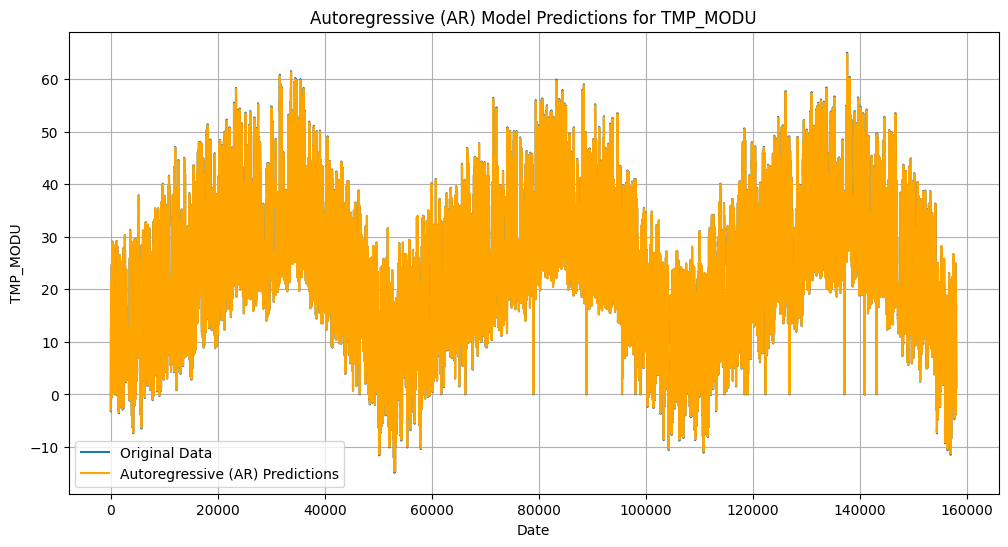

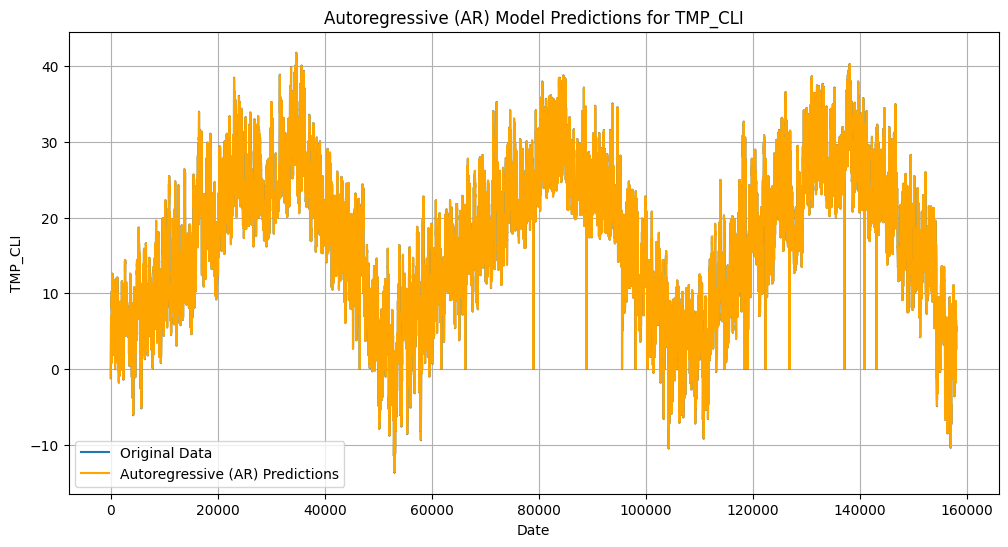

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Load the data
data = pd.read_csv('/kaggle/input/solar-power-generation-data/pv_2years_eng.csv')

# Define the columns of interest
columns_of_interest = ['TMP_MODU', 'TMP_CLI']

# Plot autoregressive (AR) results for each column
for column in columns_of_interest:
    # Fit autoregressive (AR) model
    model = AutoReg(data[column].dropna(), lags=1)  # Using lag 1 for simplicity
    model_fit = model.fit()

    # Make predictions
    predictions = model_fit.predict(start=1, end=len(data[column]))

    # Plot original data and autoregressive (AR) predictions
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[column], label='Original Data')
    plt.plot(data.index, predictions, label='Autoregressive (AR) Predictions', color='orange')

    plt.title(f'Autoregressive (AR) Model Predictions for {column}')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()